# Import Packages

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(repr) # options() to change size of plot image


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import Data

#### Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts, retrieved from [Kaggle](https://www.kaggle.com/captainozlem/framingham-chd-preprocessed-data)

### Variables:
- Gender (__male__): male or female (Categorical: 0 = Female, 1 = Male)
- __age__: Age of the patient - (Continuous)
- __education__: level of education (Categorical: 0 = High School degree or less, 1 = College Degree and Higher)
- __currentSmoker__: whether or not the patient is a current smoker (Categorical: 0 = Nonsmoker, 1 = Smoker)
- __cigsPerDay__: the number of cigarettes that the person smoked on average in one day (Continuous)
- __BPMeds__: whether or not the patient was on blood pressure medication (Categorical: 0 = No, 1 = Yes)
- __prevalentStroke__: whether or not the patient had previously had a stroke (Categorical: 0 = No, 1 = Yes)
- __prevalentHyp__: whether or not the patient was hypertensive (Categorical: 0 = No, 1 = Yes)
- __diabetes__: whether or not the patient had diabetes (Categorical: 0 = No, 1 = Yes)
- __totChol__: total cholesterol level (Continuous)
- __sysBP__: systolic blood pressure (Continuous)
- __diaBP__: diastolic blood pressure (Continuous)
- __BMI__: Body Mass Index (Continuous)
- __heartRate__: heart rate (Continuous)
- __glucose__: glucose level (Continuous)

### Target variable
- __TenYearCHD__: 10 year risk of coronary heart disease CHD (Categorical: 1 = Yes, 0 = No)

In [2]:
kgheart = read.csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/CHD_preprocessed.csv')
head(kgheart)

male age education currentSmoker cigsPerDay BPMeds prevalentStroke
1 1    39  1         0              0         0      0              
2 0    46  0         0              0         0      0              
3 1    48  0         1             20         0      0              
4 0    61  1         1             30         0      0              
5 0    46  1         1             23         0      0              
6 0    43  0         0              0         0      0              
  prevalentHyp diabetes totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 0            0        195     106.0  70   26.97 80         77     0         
2 0            0        250     121.0  81   28.73 95         76     0         
3 0            0        245     127.5  80   25.34 75         70     0         
4 1            0        225     150.0  95   28.58 65        103     1         
5 0            0        285     130.0  84   23.10 85         85     0         
6 1            0        228     180.0 110   30.30 77         99     0

In [3]:
str(kgheart)

'data.frame':	4133 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  1 0 0 1 1 0 0 0 0 0 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : num  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : num  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : num  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : num  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


# Data Exploration
***

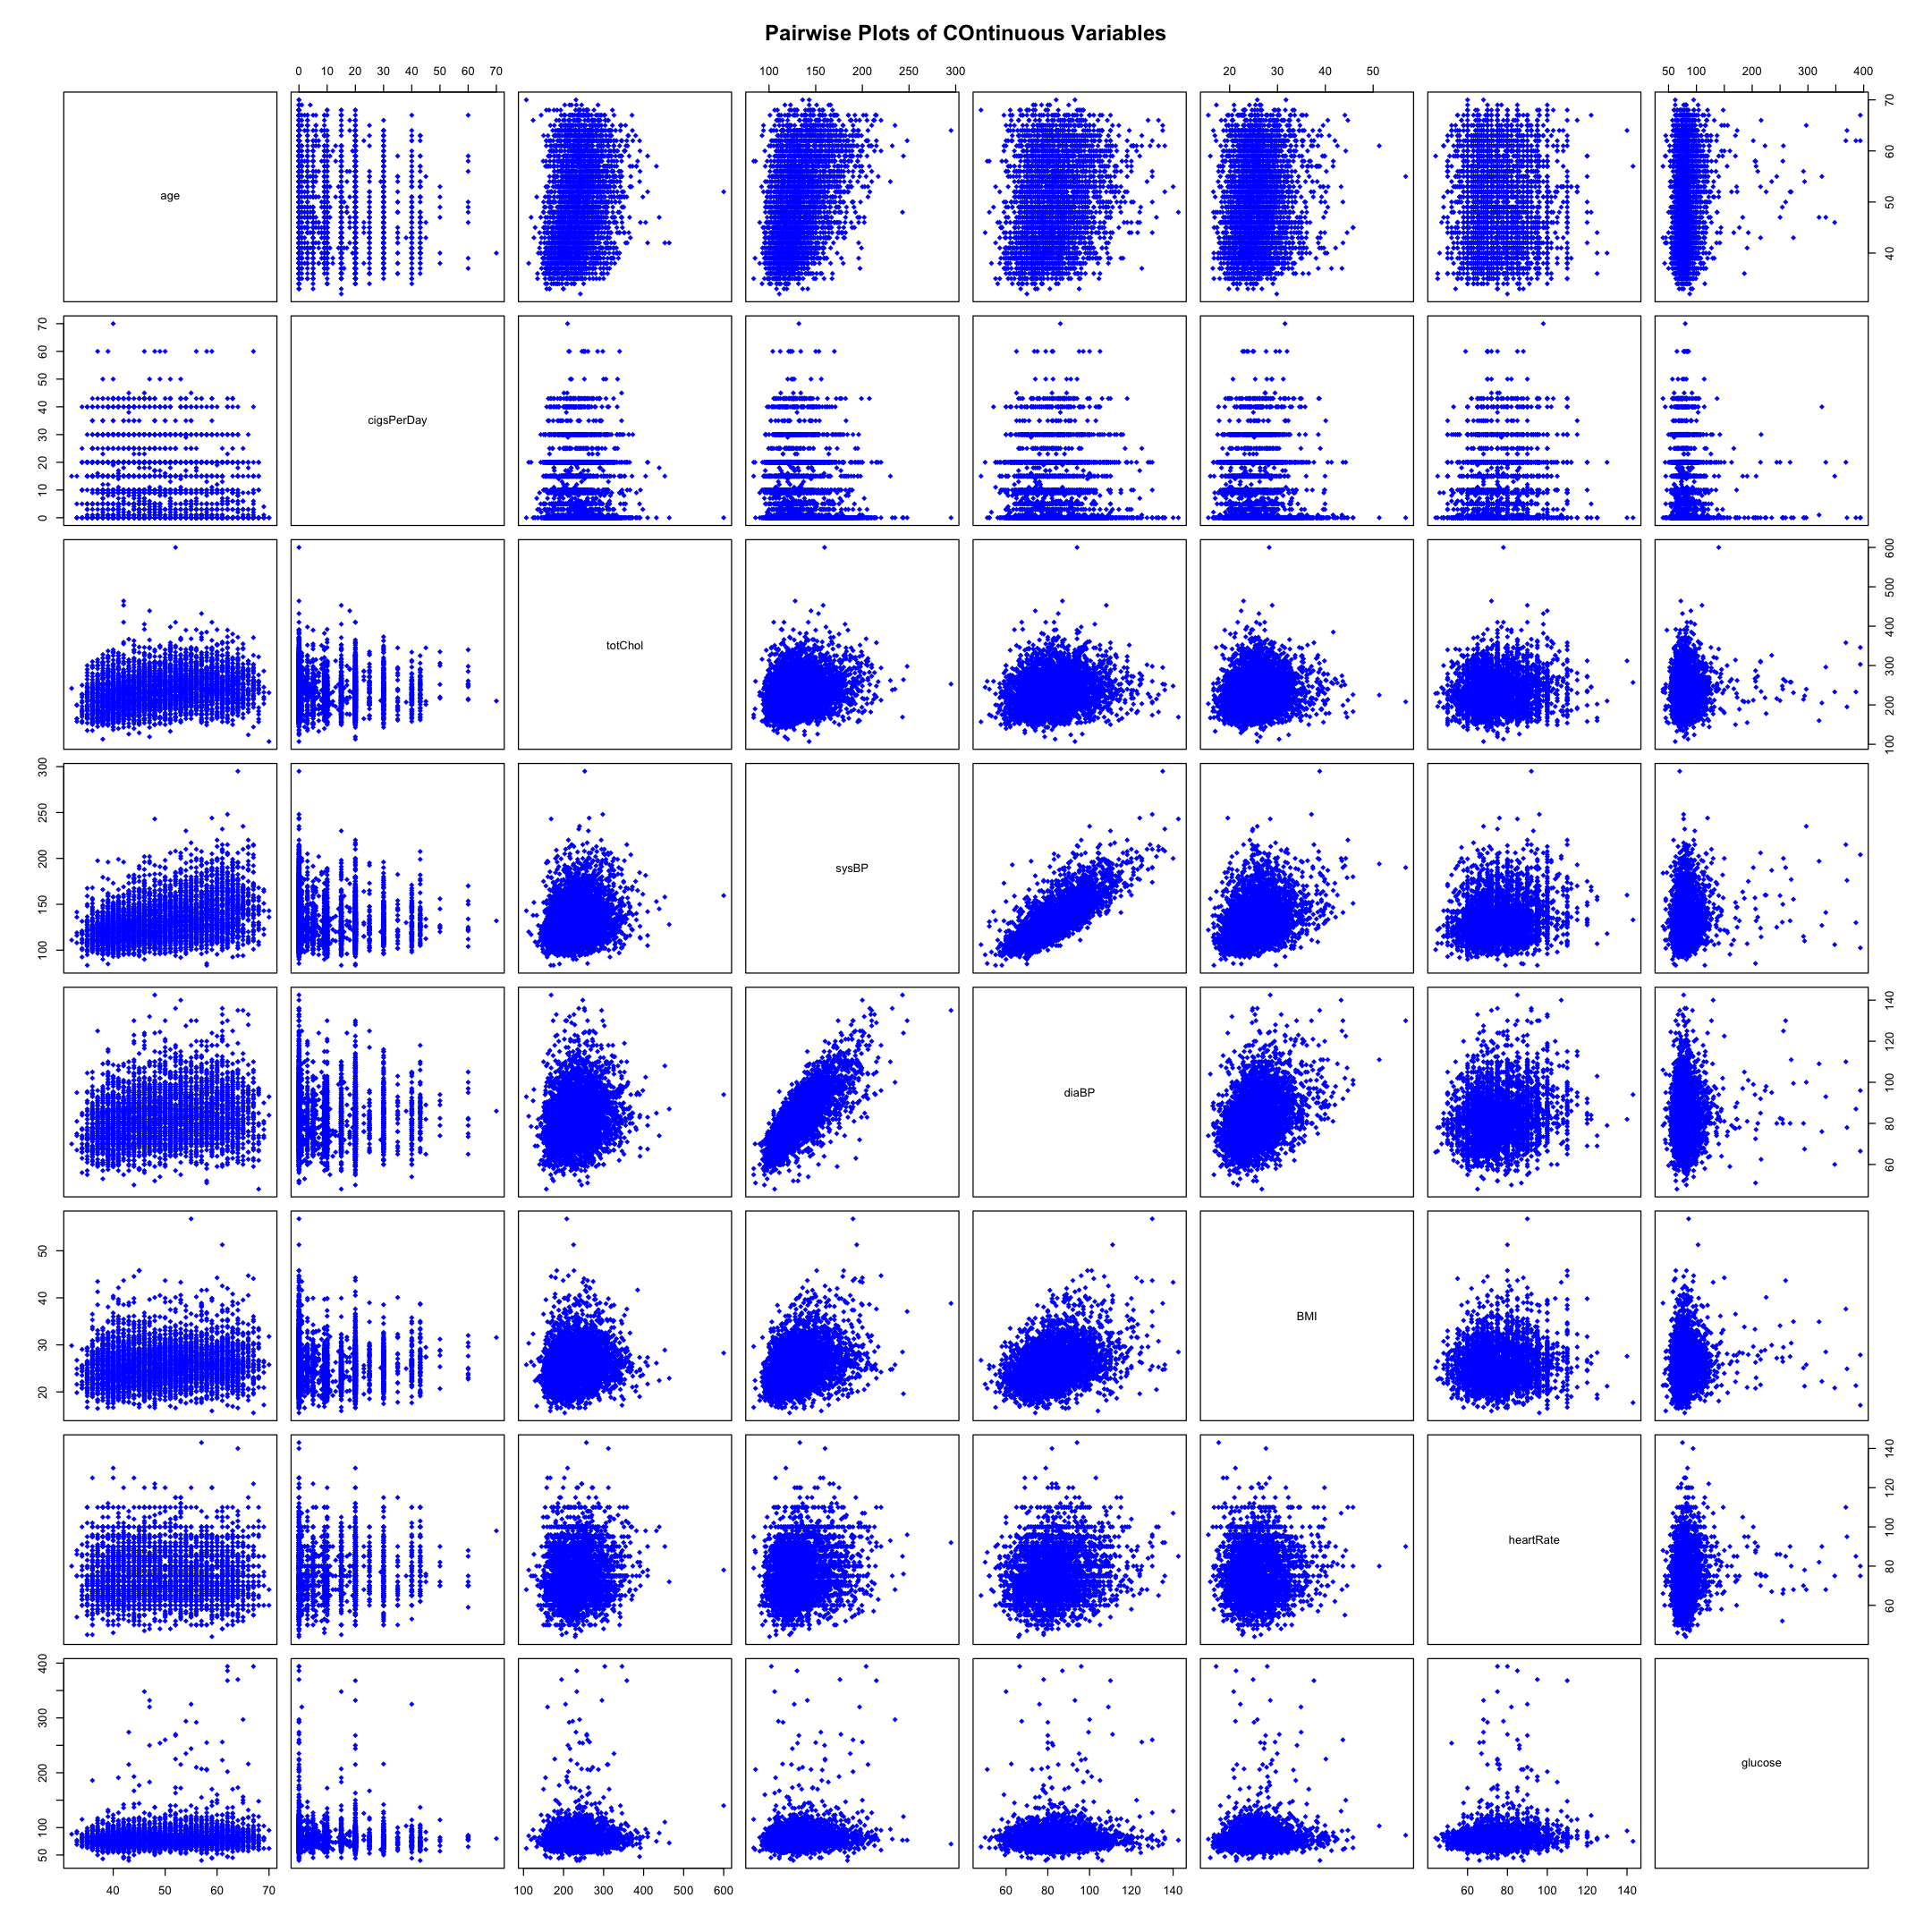

In [4]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(~ age + cigsPerDay + totChol + sysBP + diaBP + BMI + heartRate + glucose, 
      col = "blue",                                         # Change color
      pch = 18,  
      data = kgheart,
      main = 'Pairwise Plots of COntinuous Variables')

In [5]:
cor.test(kgheart$sysBP, kgheart$diaBP, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  kgheart$sysBP and kgheart$diaBP
t = 81.361, df = 4131, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7726887 0.7961333
sample estimates:
      cor 
0.7846914 


__*Note that sysBP and diaBP are strongly correlated*__

## Age

### 1. Histogram

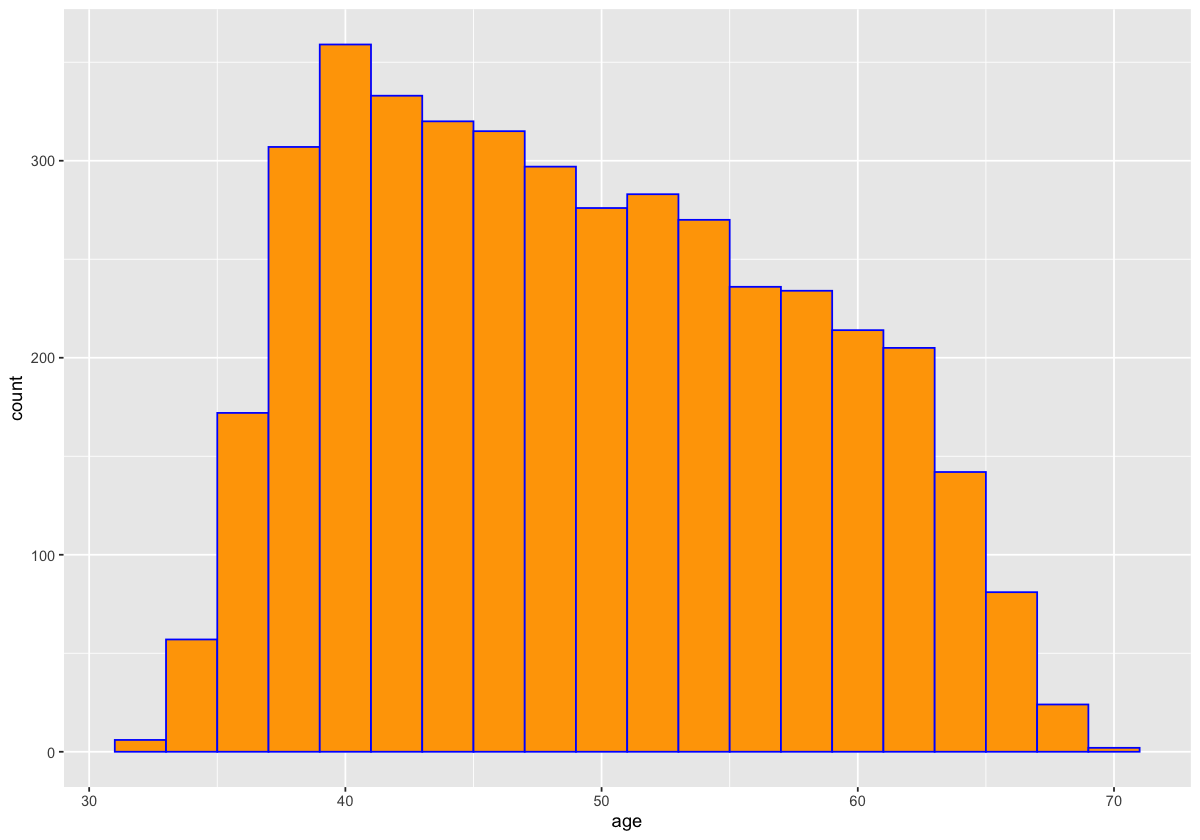

In [6]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(data = kgheart, aes(x = age)) + geom_histogram(bins = 20, fill='orange', color = "blue")

### 2. Age Distribution by Risk for Coronary Heart Disease (CHD)

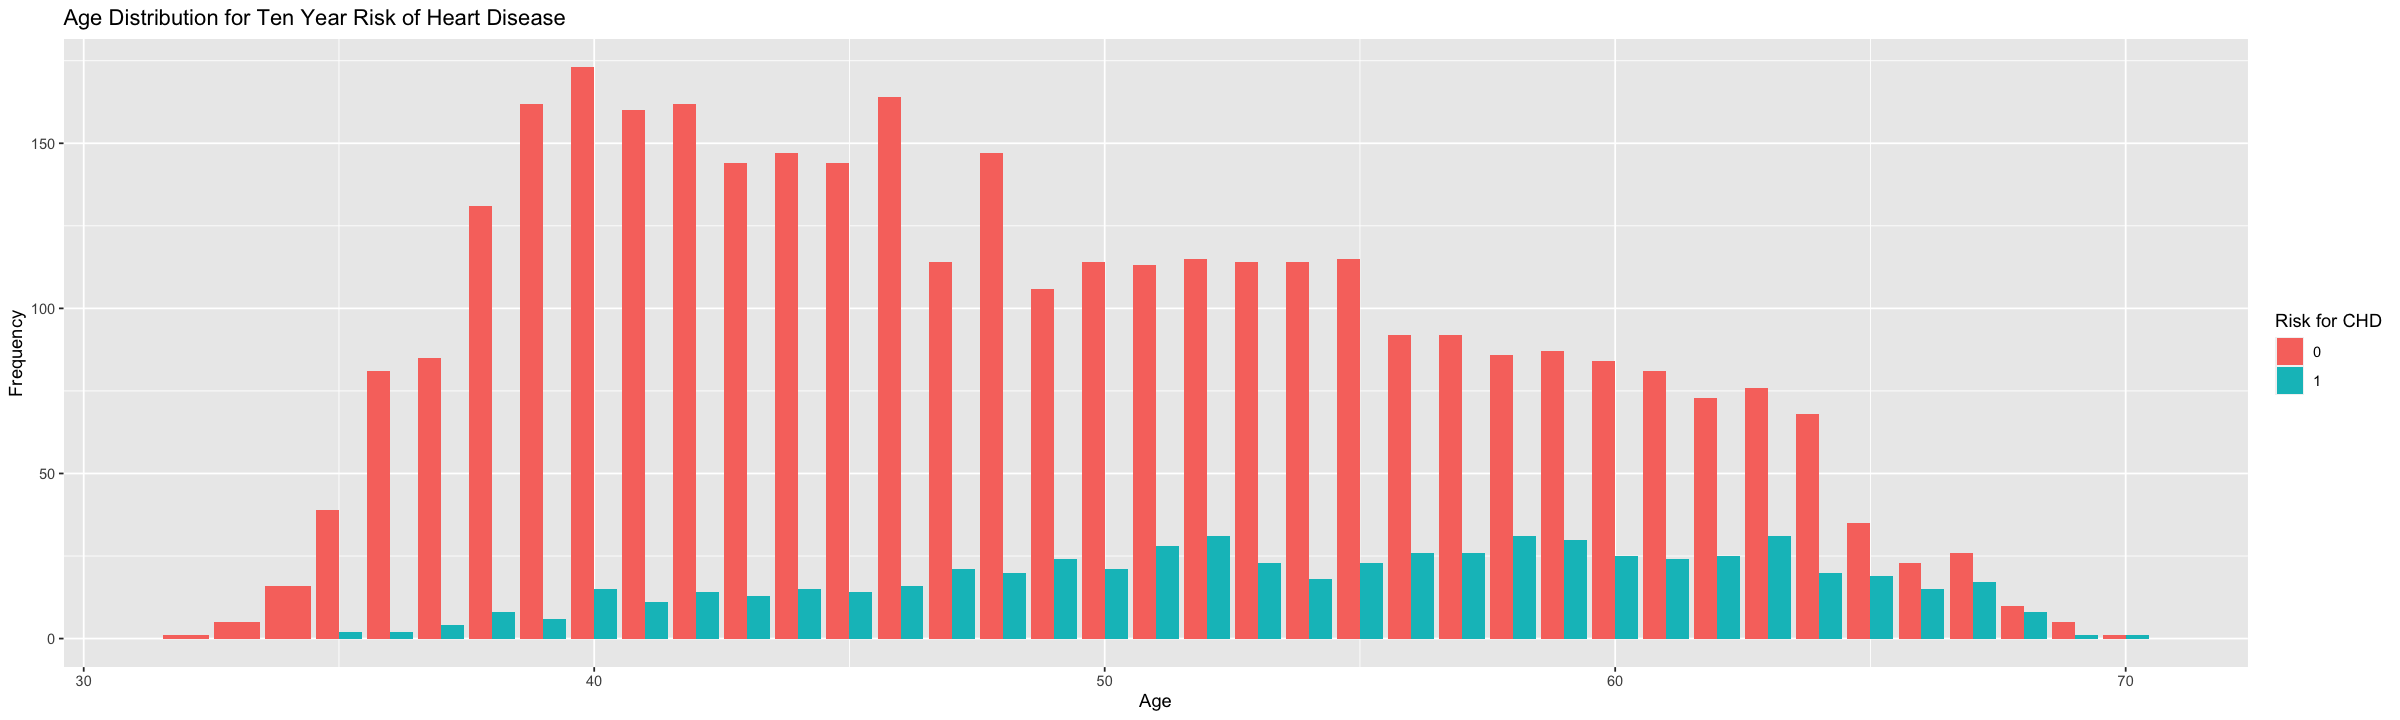

In [7]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(TenYearCHD)), position = "dodge") + 
  ggtitle("Age Distribution for Ten Year Risk of Heart Disease") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Risk for CHD")

__*Risk for CHD seems to be fairly even for ages 40 and above*__

### 3. Age Distribution by Gender

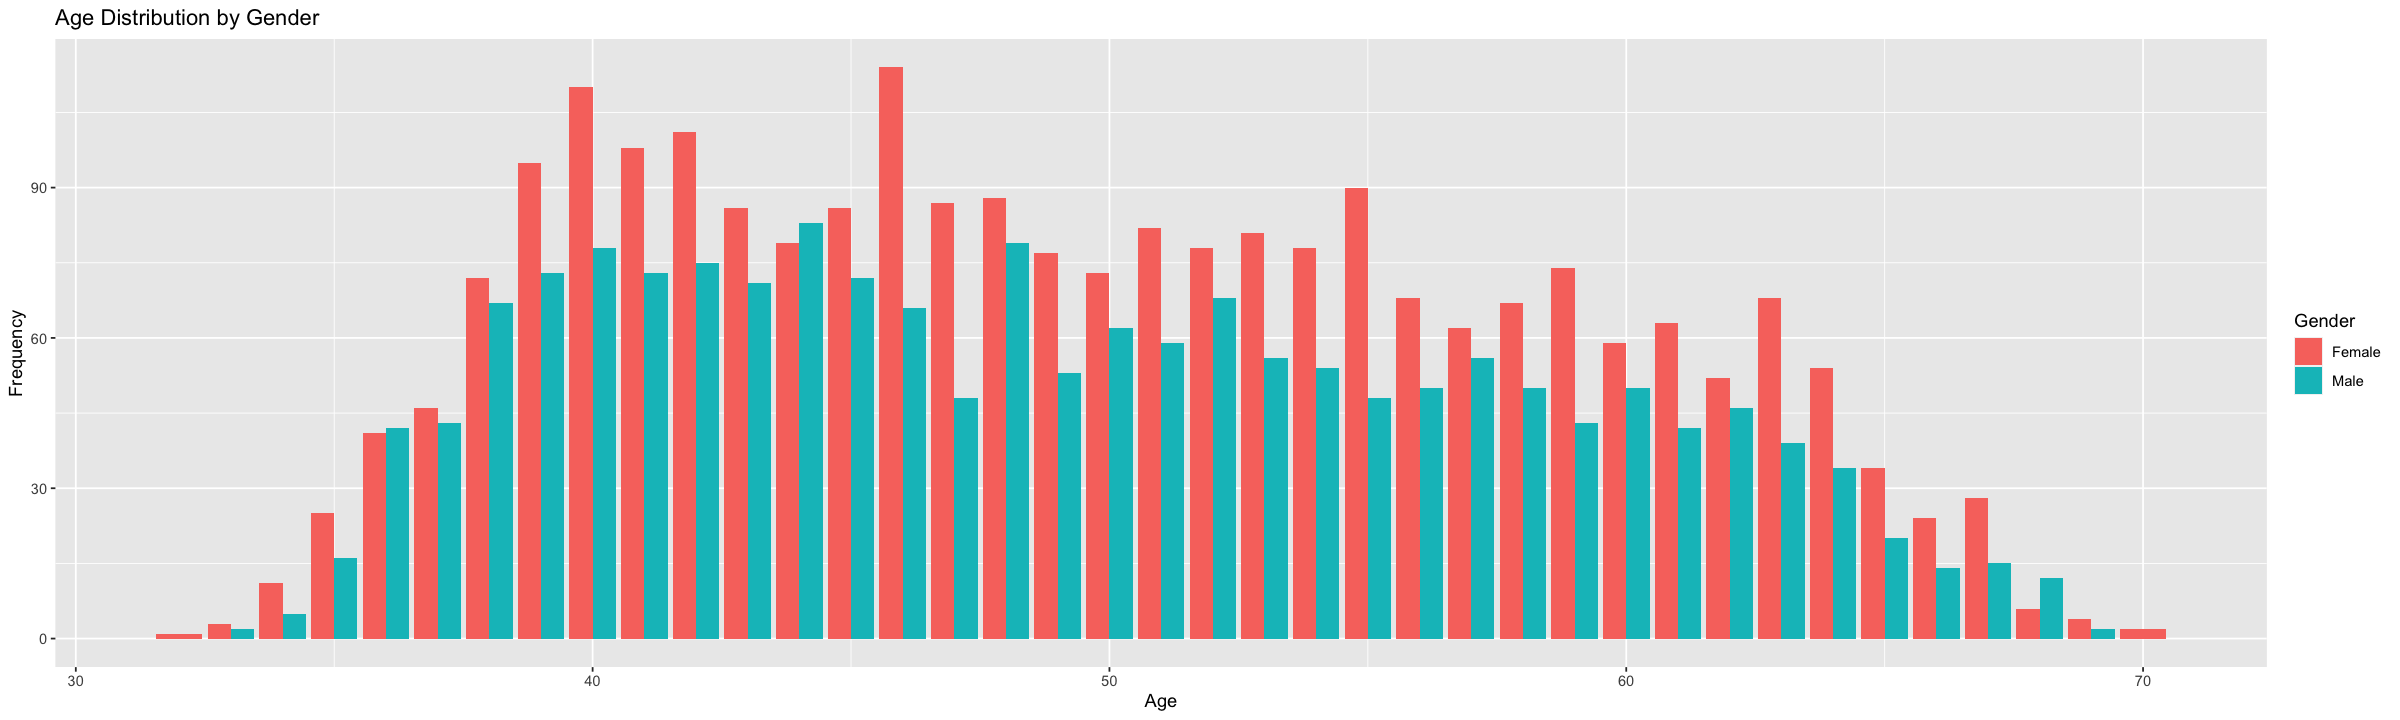

In [8]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Age Distribution by Gender") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

__*There are more women than men in the majority of the age groups*__

### 4. Age Distribution by Education Level

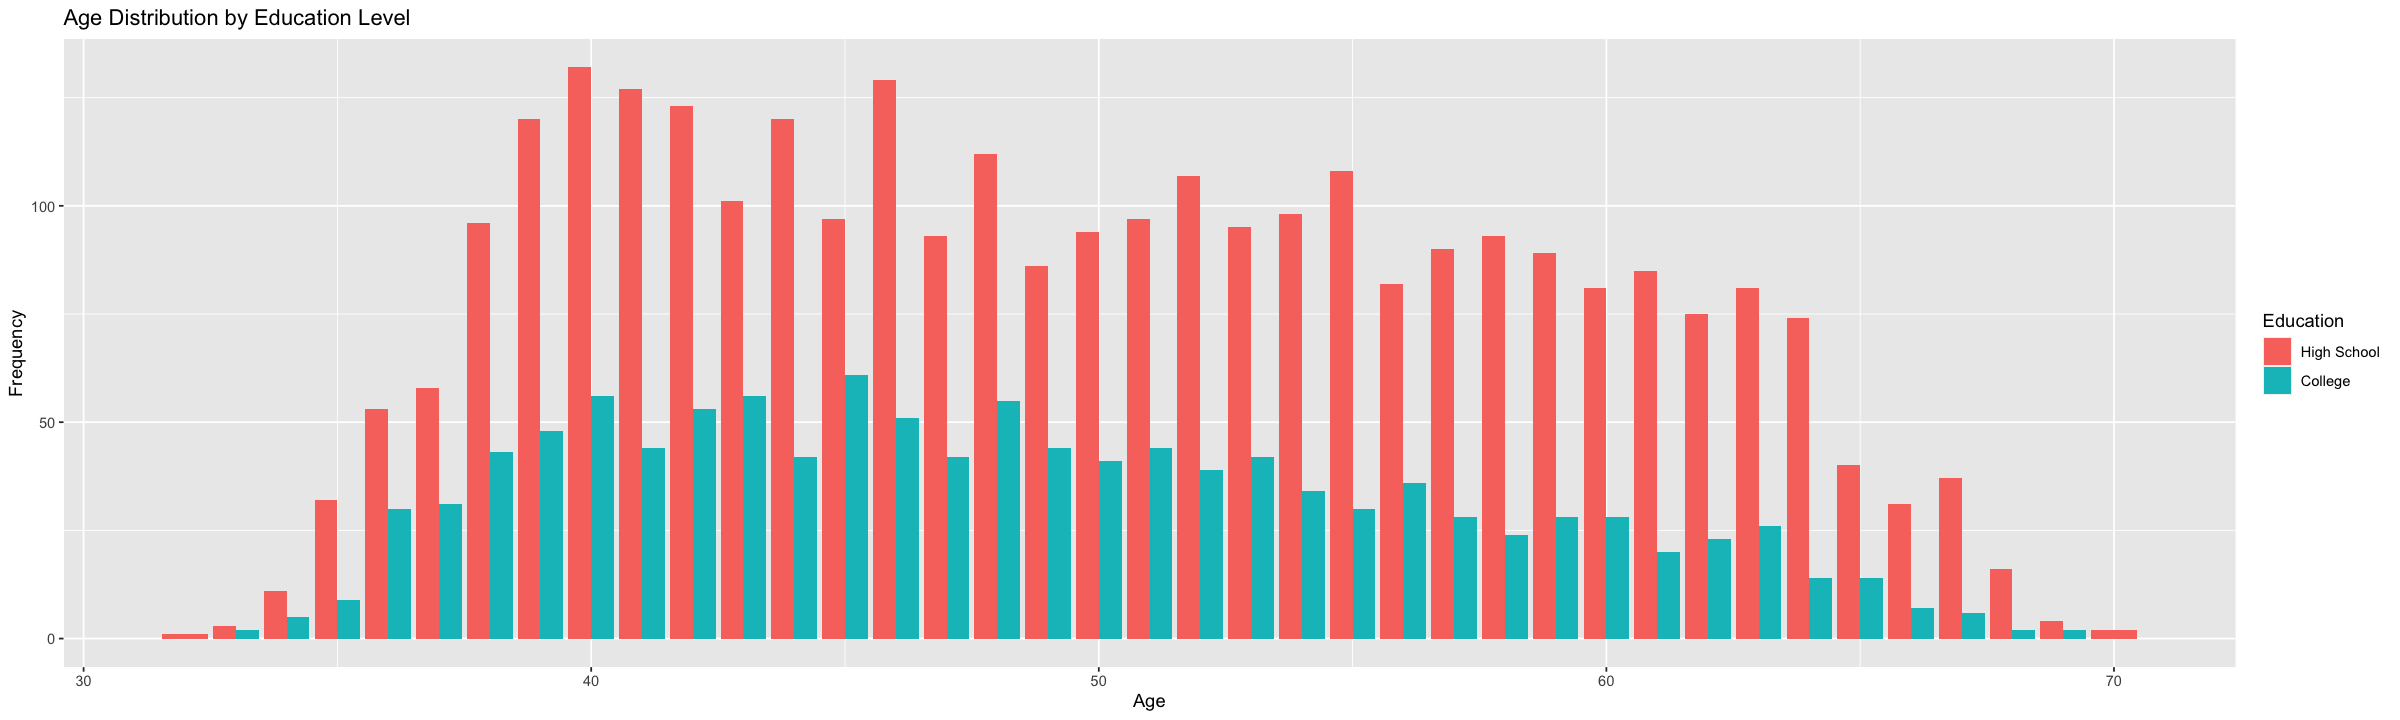

In [9]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(education)), position = "dodge") + 
  ggtitle("Age Distribution by Education Level") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Education", labels = c("High School", "College"))

**_There are overall less college graduates in this dataset_**

### 5. Age Distribution by Smoking Status 

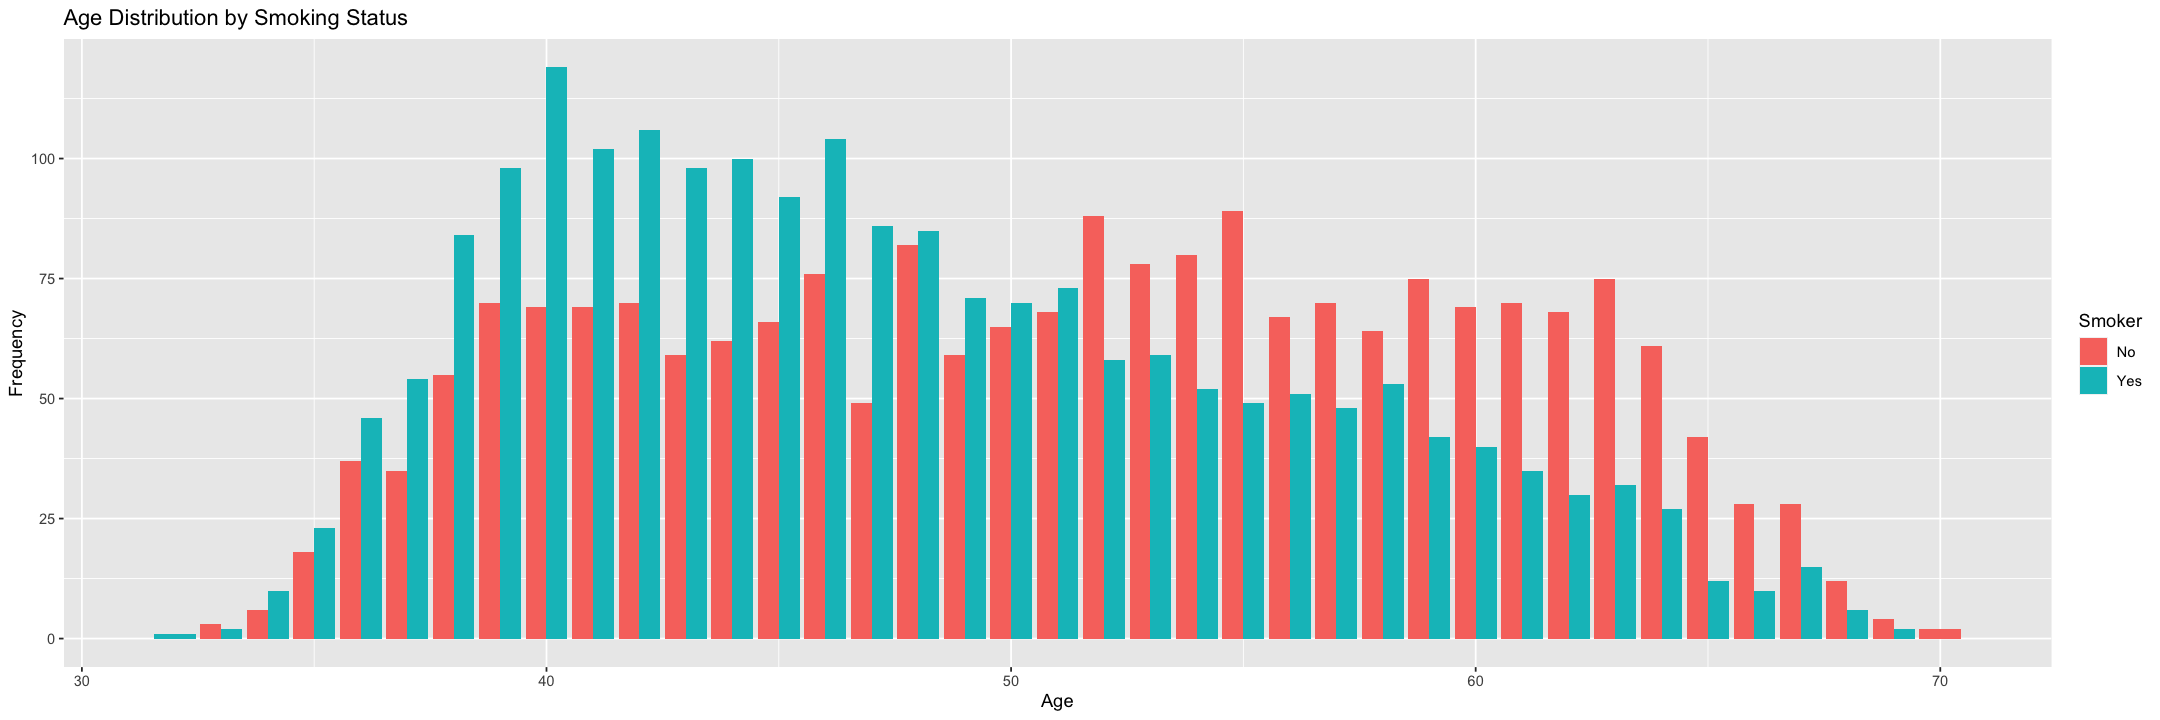

In [10]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(currentSmoker)), position = "dodge") + 
  ggtitle("Age Distribution by Smoking Status") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Smoker", labels = c("No", "Yes"))

**_There are more smokers than nonsmokers under age 50, at which point the reverse becomes true_**

### 6. Age Distribution by Prevalence of Hypertension

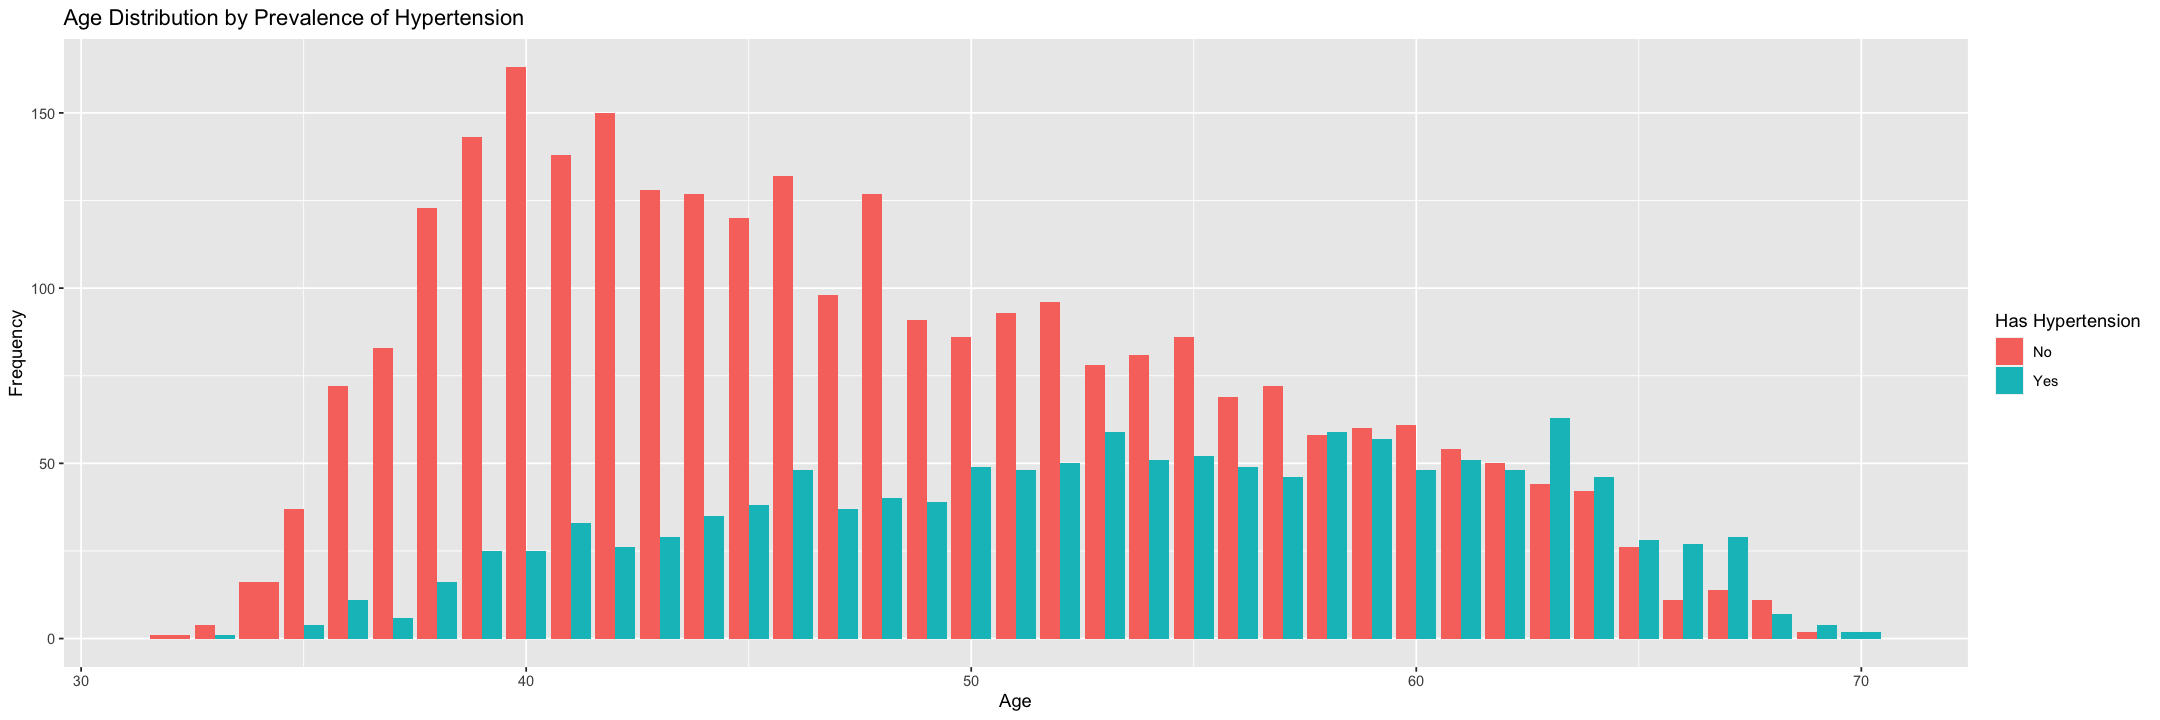

In [11]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(prevalentHyp)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Hypertension") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Has Hypertension", , labels = c("No", "Yes"))

**_There are more people under age 57 that don't have hypertension than people that do, after which point the number of people with and without hypertension are evenly split_**

### 7. Age Distribution By Prevalence of Diabetes

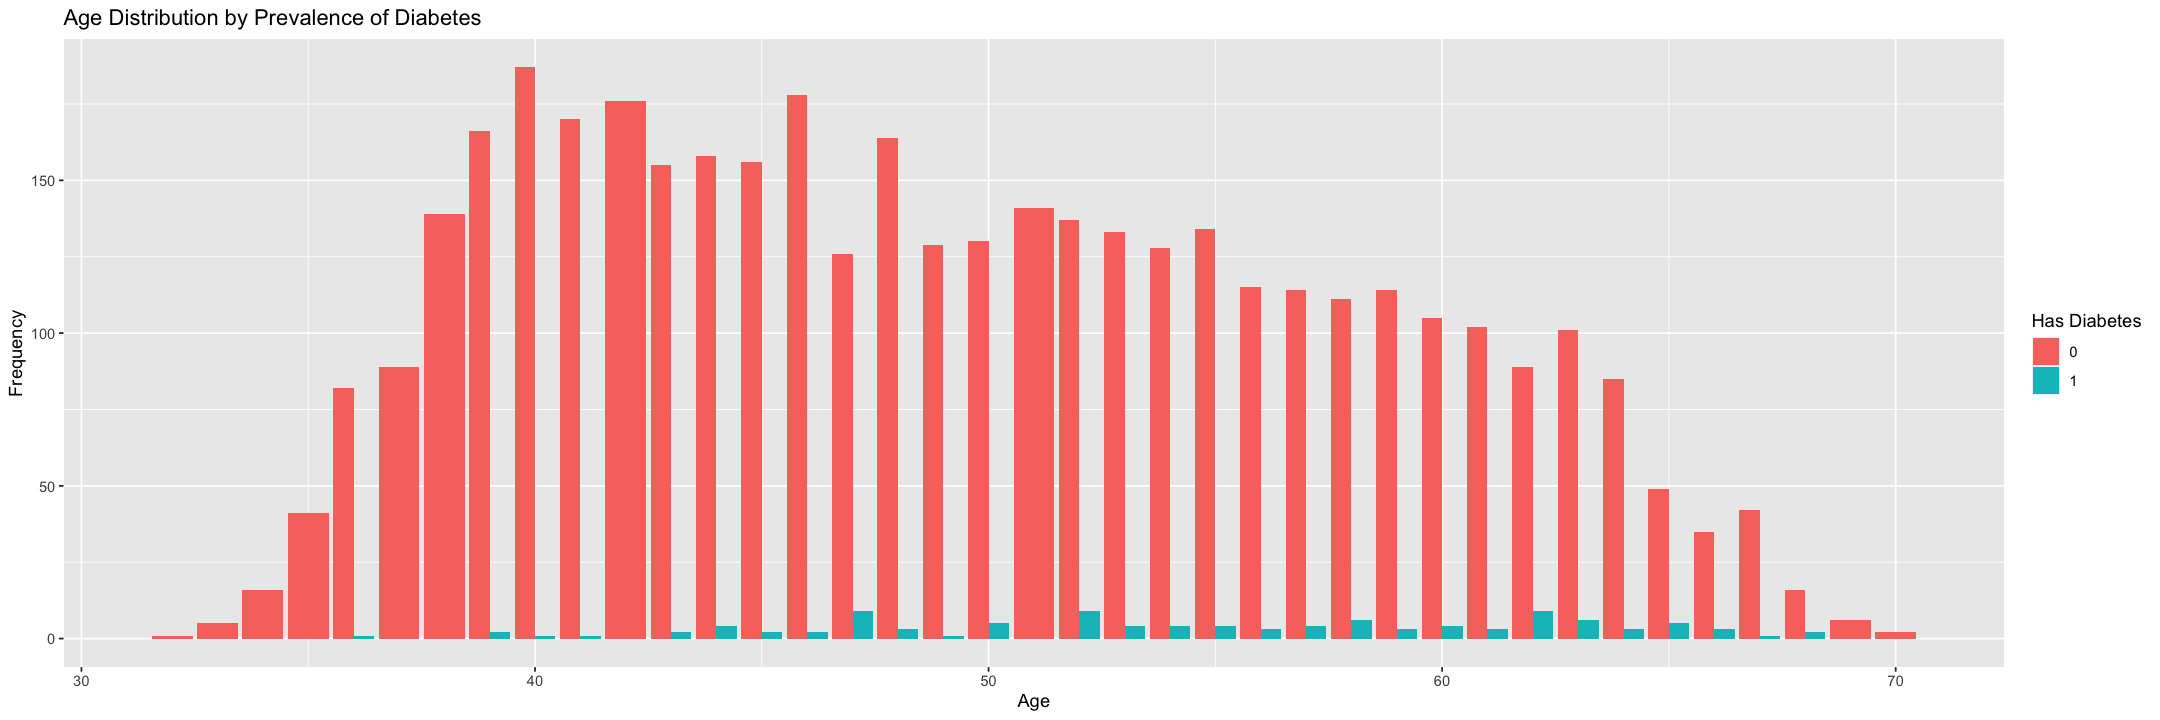

In [12]:
options(repr.plot.width=18, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = age, fill = as.factor(diabetes)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Diabetes") +
  xlab("Age") +
  ylab("Frequency") + scale_fill_discrete(name = "Has Diabetes")

**_The large majority of people are not diabetic across all age groups, which provides little insight on the impact of diabetes in the risk for CHD._**

### 8. Age Distribution for BMI

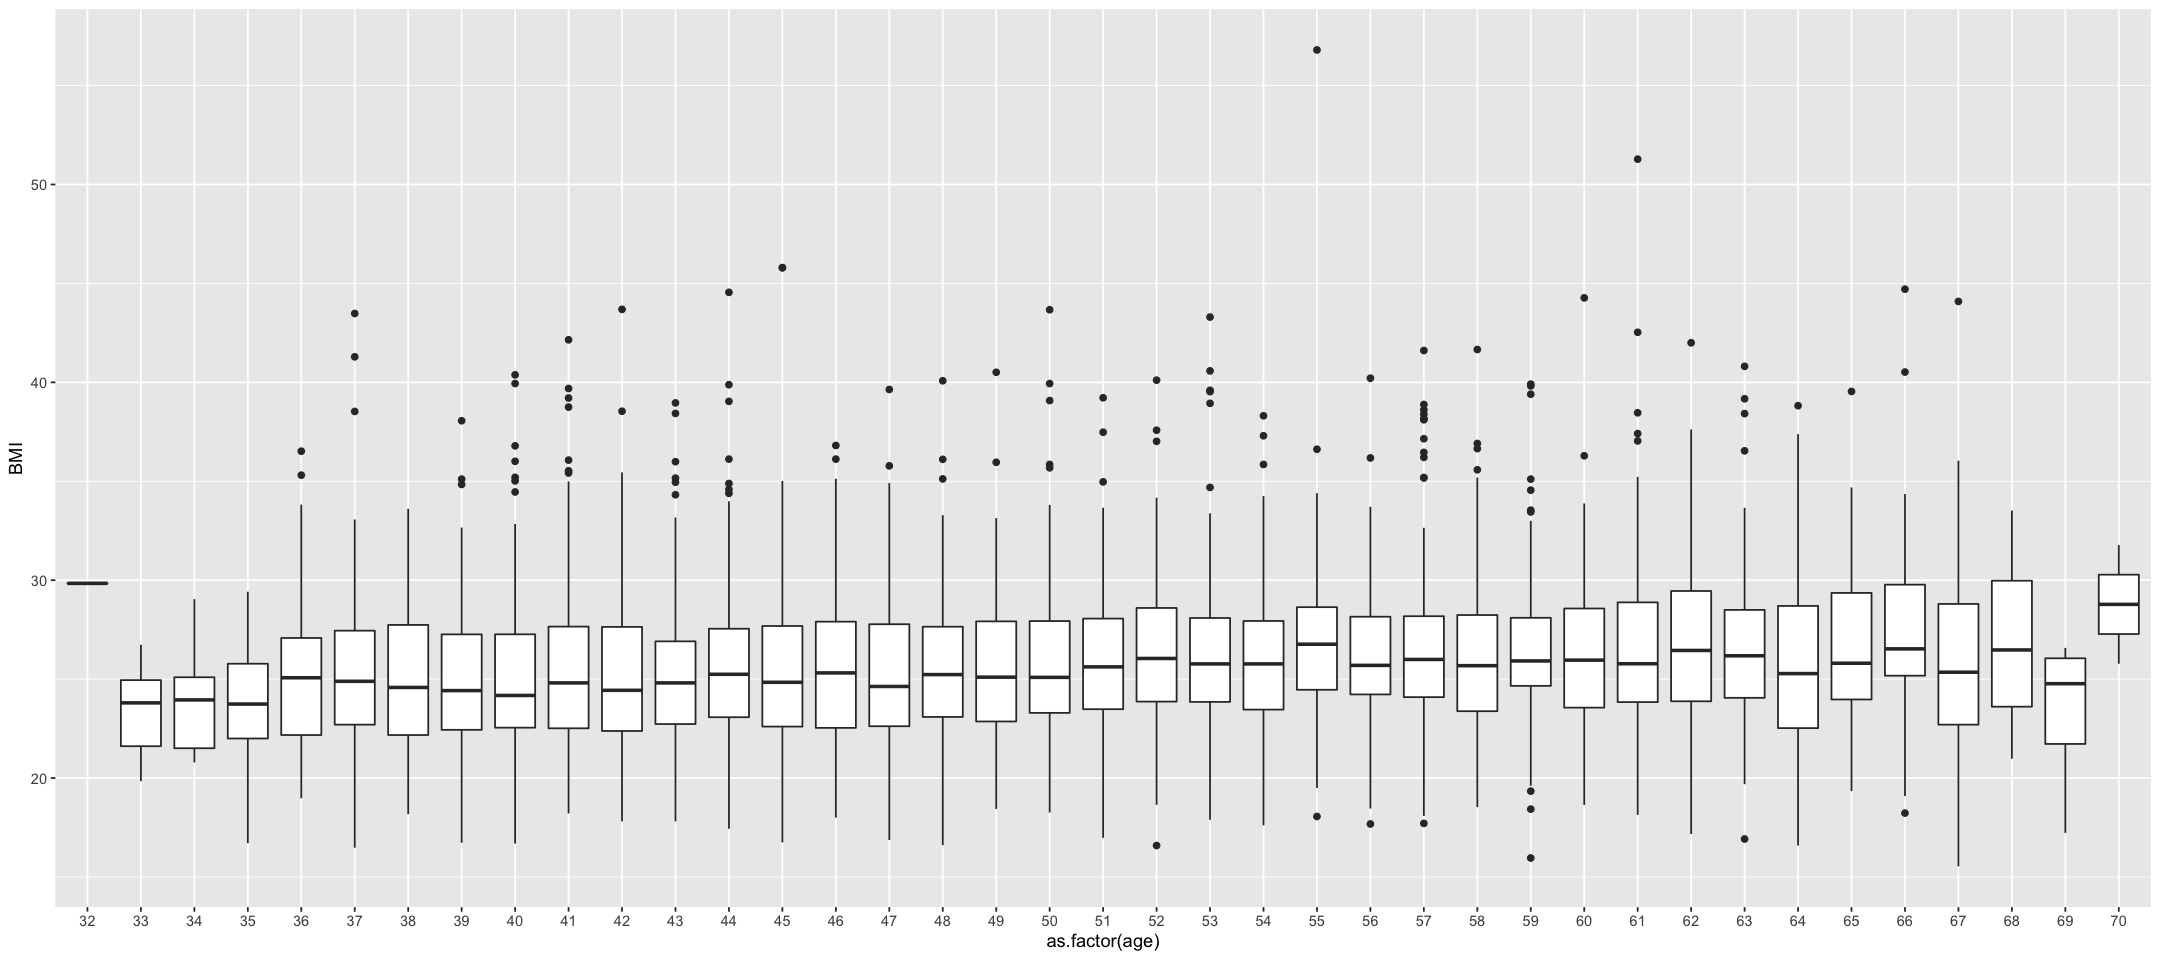

In [13]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(age), y = BMI)) + geom_boxplot()

__*BMI is evenly distributed across all ages, which implies that there is no relationship between age and BMI*__

## BMI

### 1. Histogram

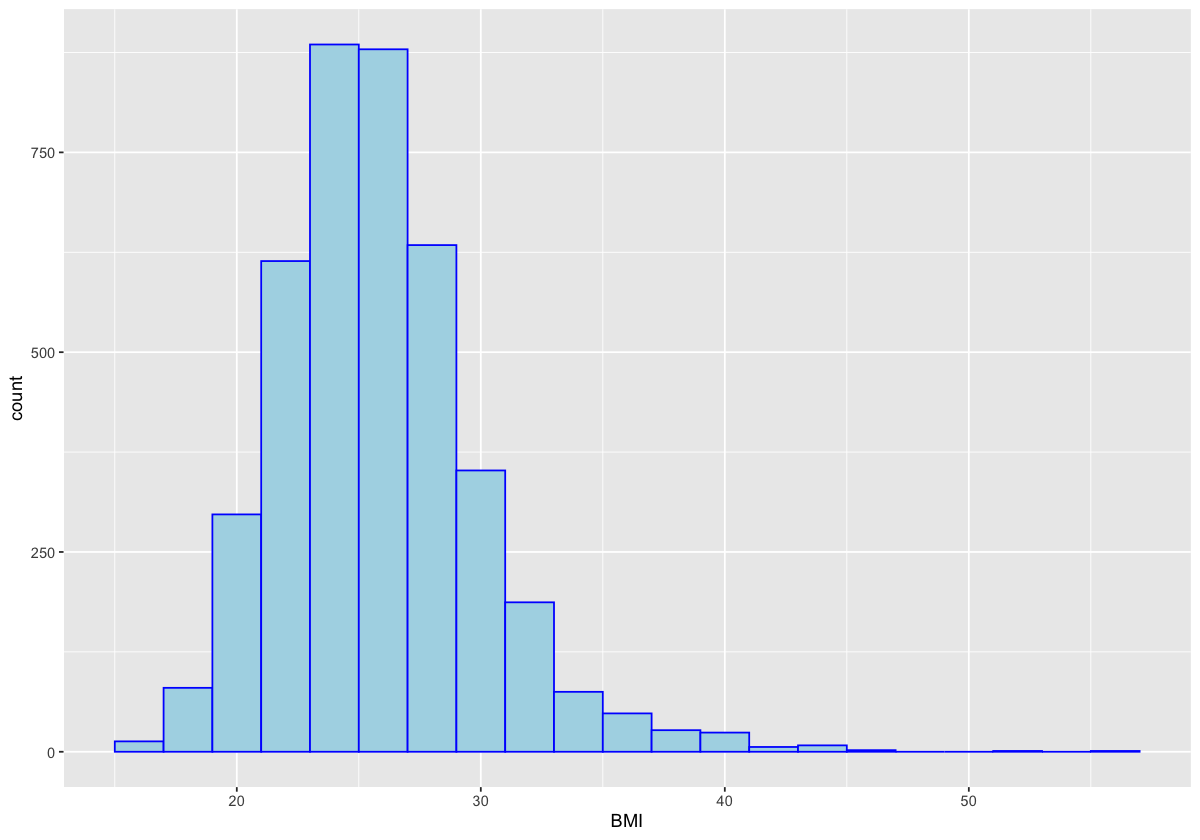

In [14]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(data = kgheart, aes(x = BMI)) + geom_histogram(binwidth = 2, fill='lightblue', color = "blue")

**_BMI is approximately normally disptributed in this dataset_**

### 2. BMI Distribution by Prevalence of Stroke

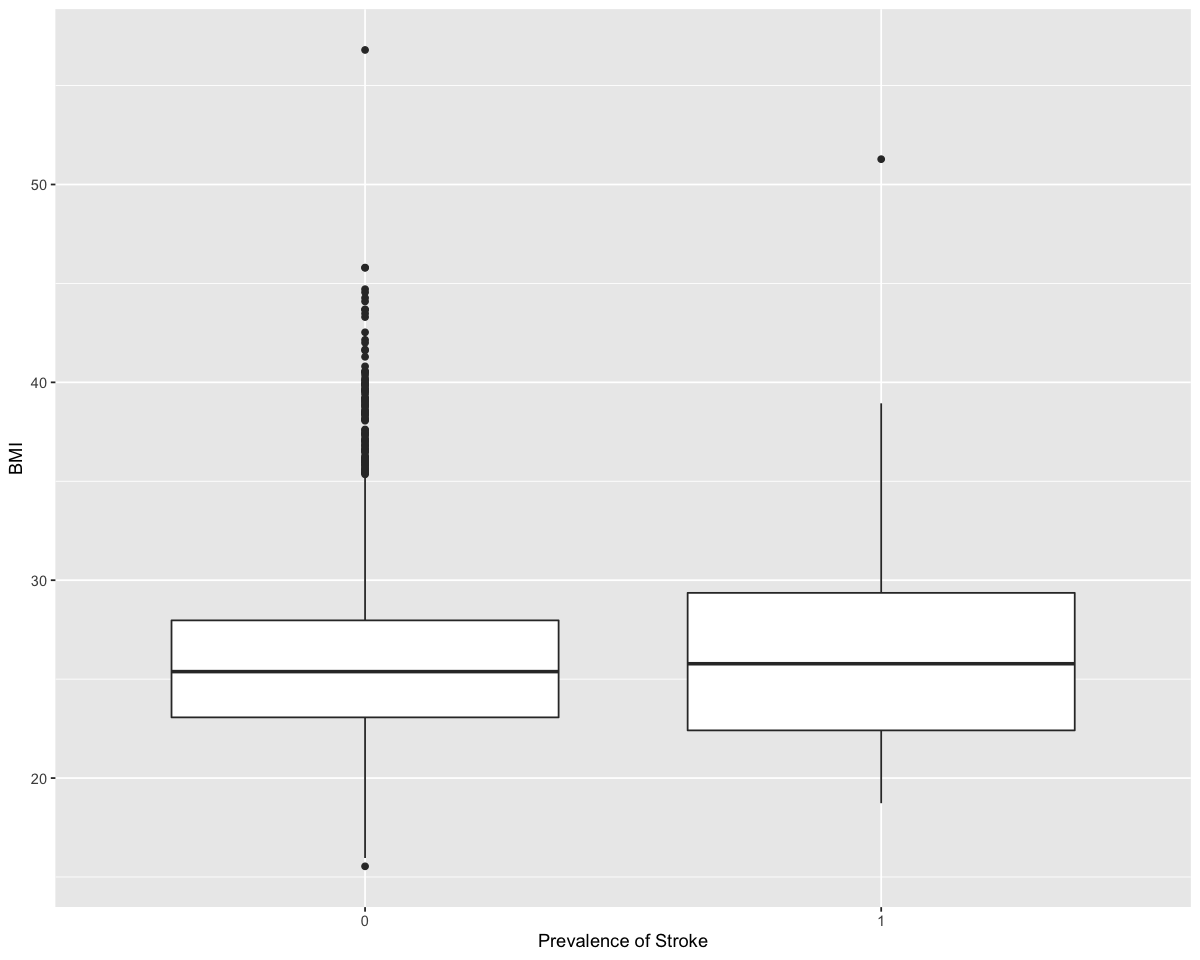

In [15]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(prevalentStroke), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Stroke", y = "BMI")

**_BMI does not vary significantly between people who had a stroke and people who didn't have a stroke_**

### 3. BMI Distribution by Prevalence of Hypertension

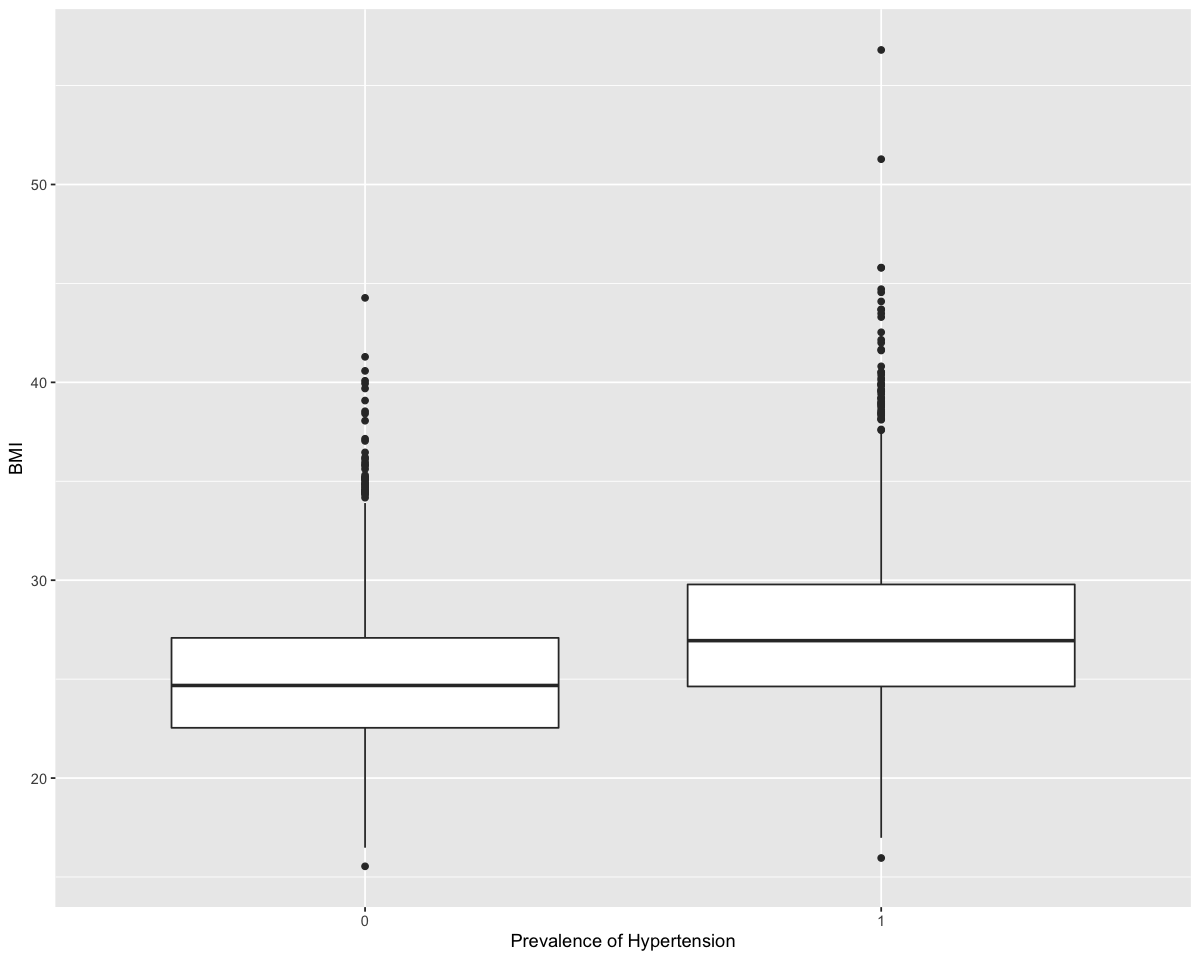

In [16]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(prevalentHyp), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Hypertension", y = "BMI")

**_BMI seems to be slightly higher for people with high blood pressure_**

### 4. BMI Distribution by Prevalence of Diabetes

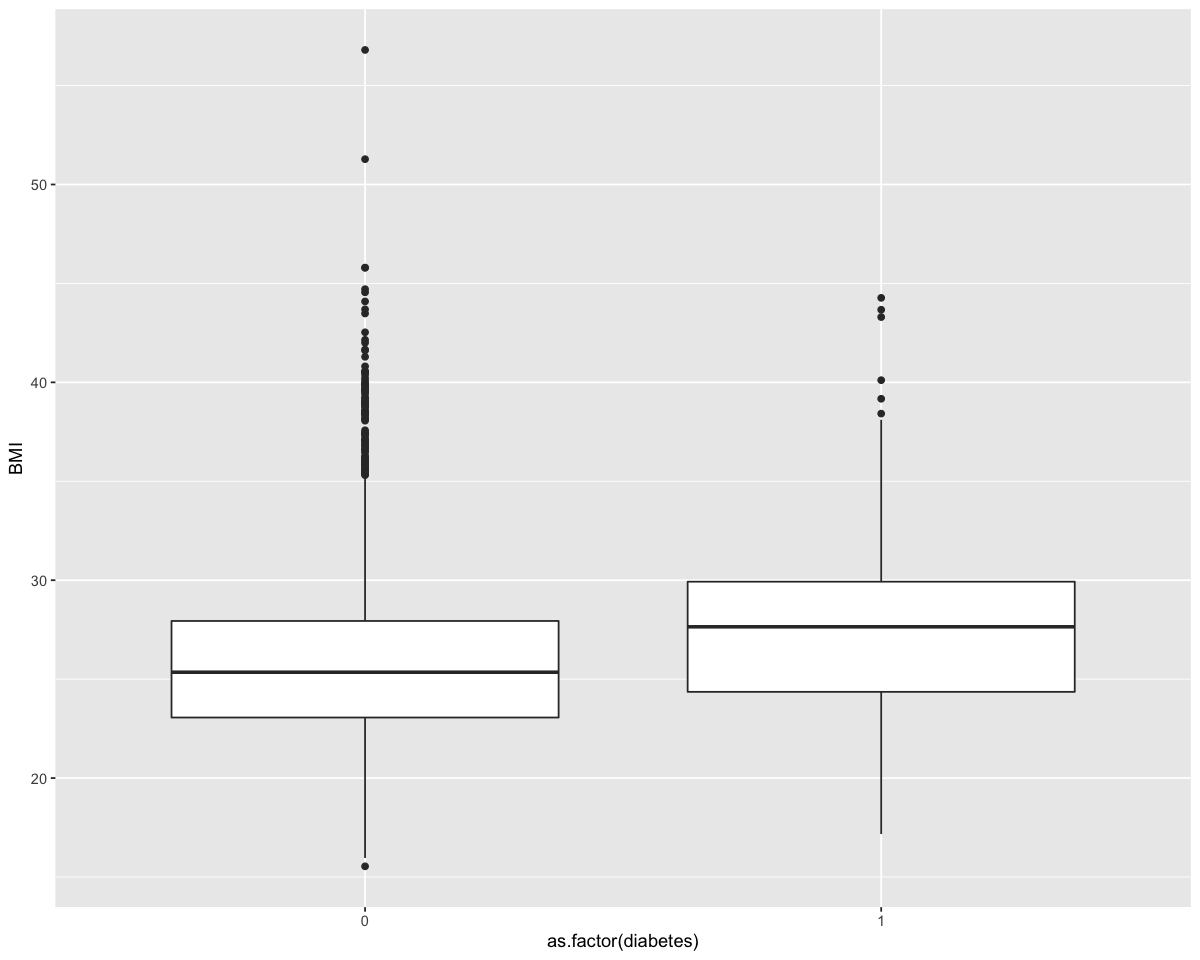

In [17]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(diabetes), y = BMI)) + geom_boxplot()

**_BMI seems to be higher for people with diabetes_**

### 5. BMI Distribution by Risk of Coranary Heart Disease

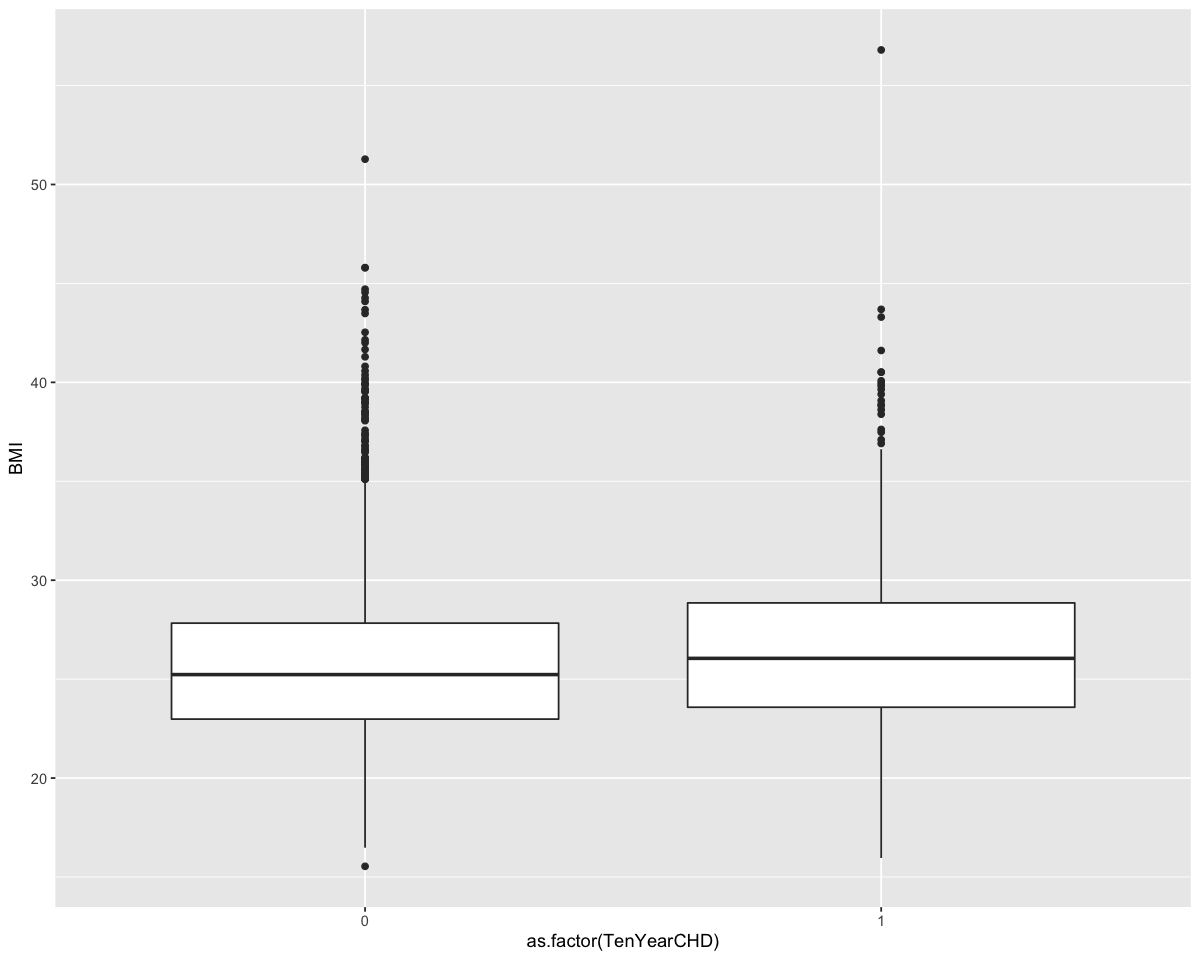

In [18]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(kgheart, aes(x = as.factor(TenYearCHD), y = BMI)) + geom_boxplot()

**_BMI seems to be slightly higher for people with a 10-year risk of CVD_**

## Gender

In [19]:
count(kgheart, male)

male n   
1 0    2367
2 1    1766

__*57.3% of the individuals in this dataset are female and 42.7% are male*__

### 1. Education by Gender

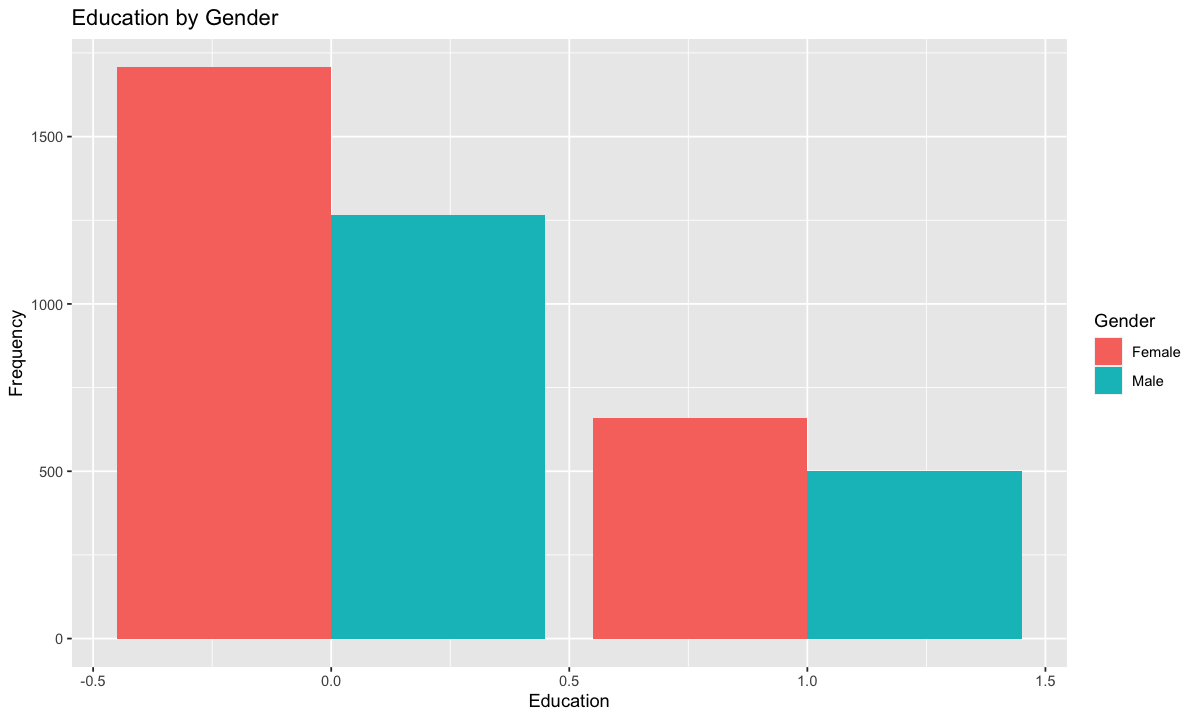

In [20]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = education, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Education by Gender") +
  xlab("Education") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))   

__*This dataset includes significantly more men than women and it seems the education level is proportional between genders*__

### 2. Gender by Smoking Status

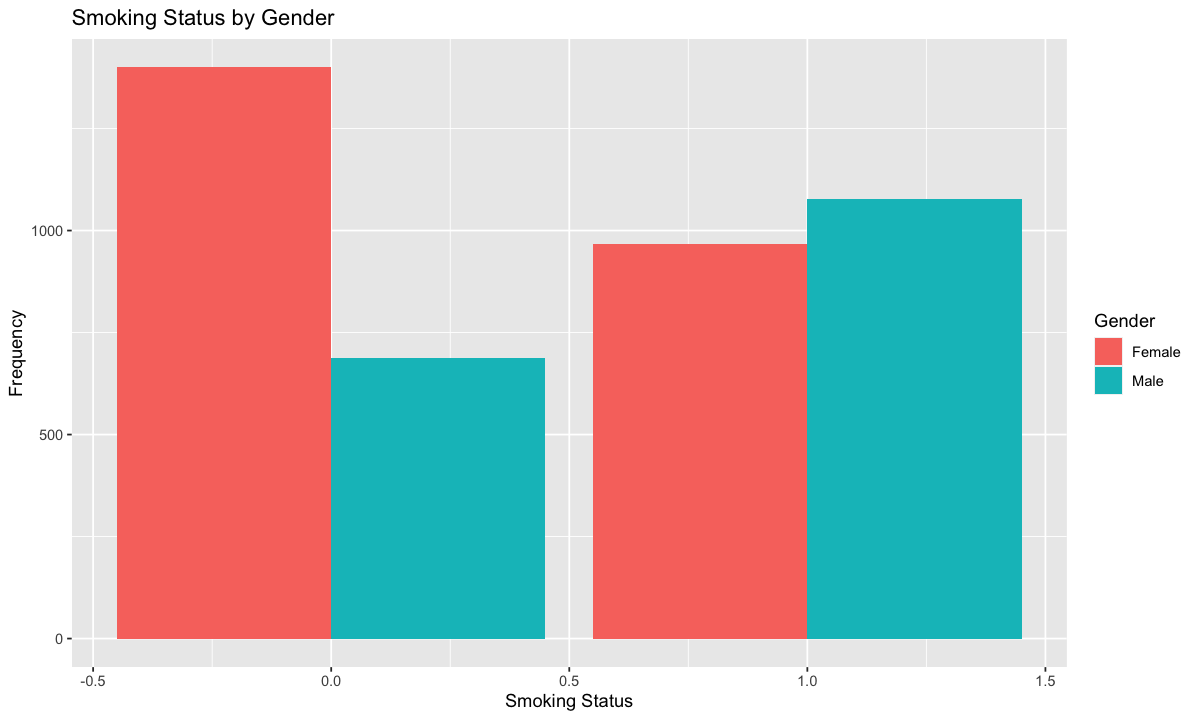

In [21]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = currentSmoker, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Smoking Status by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

__*In this dataset it seems that more men than women are smokers, especially considering the ratio of men to women*__

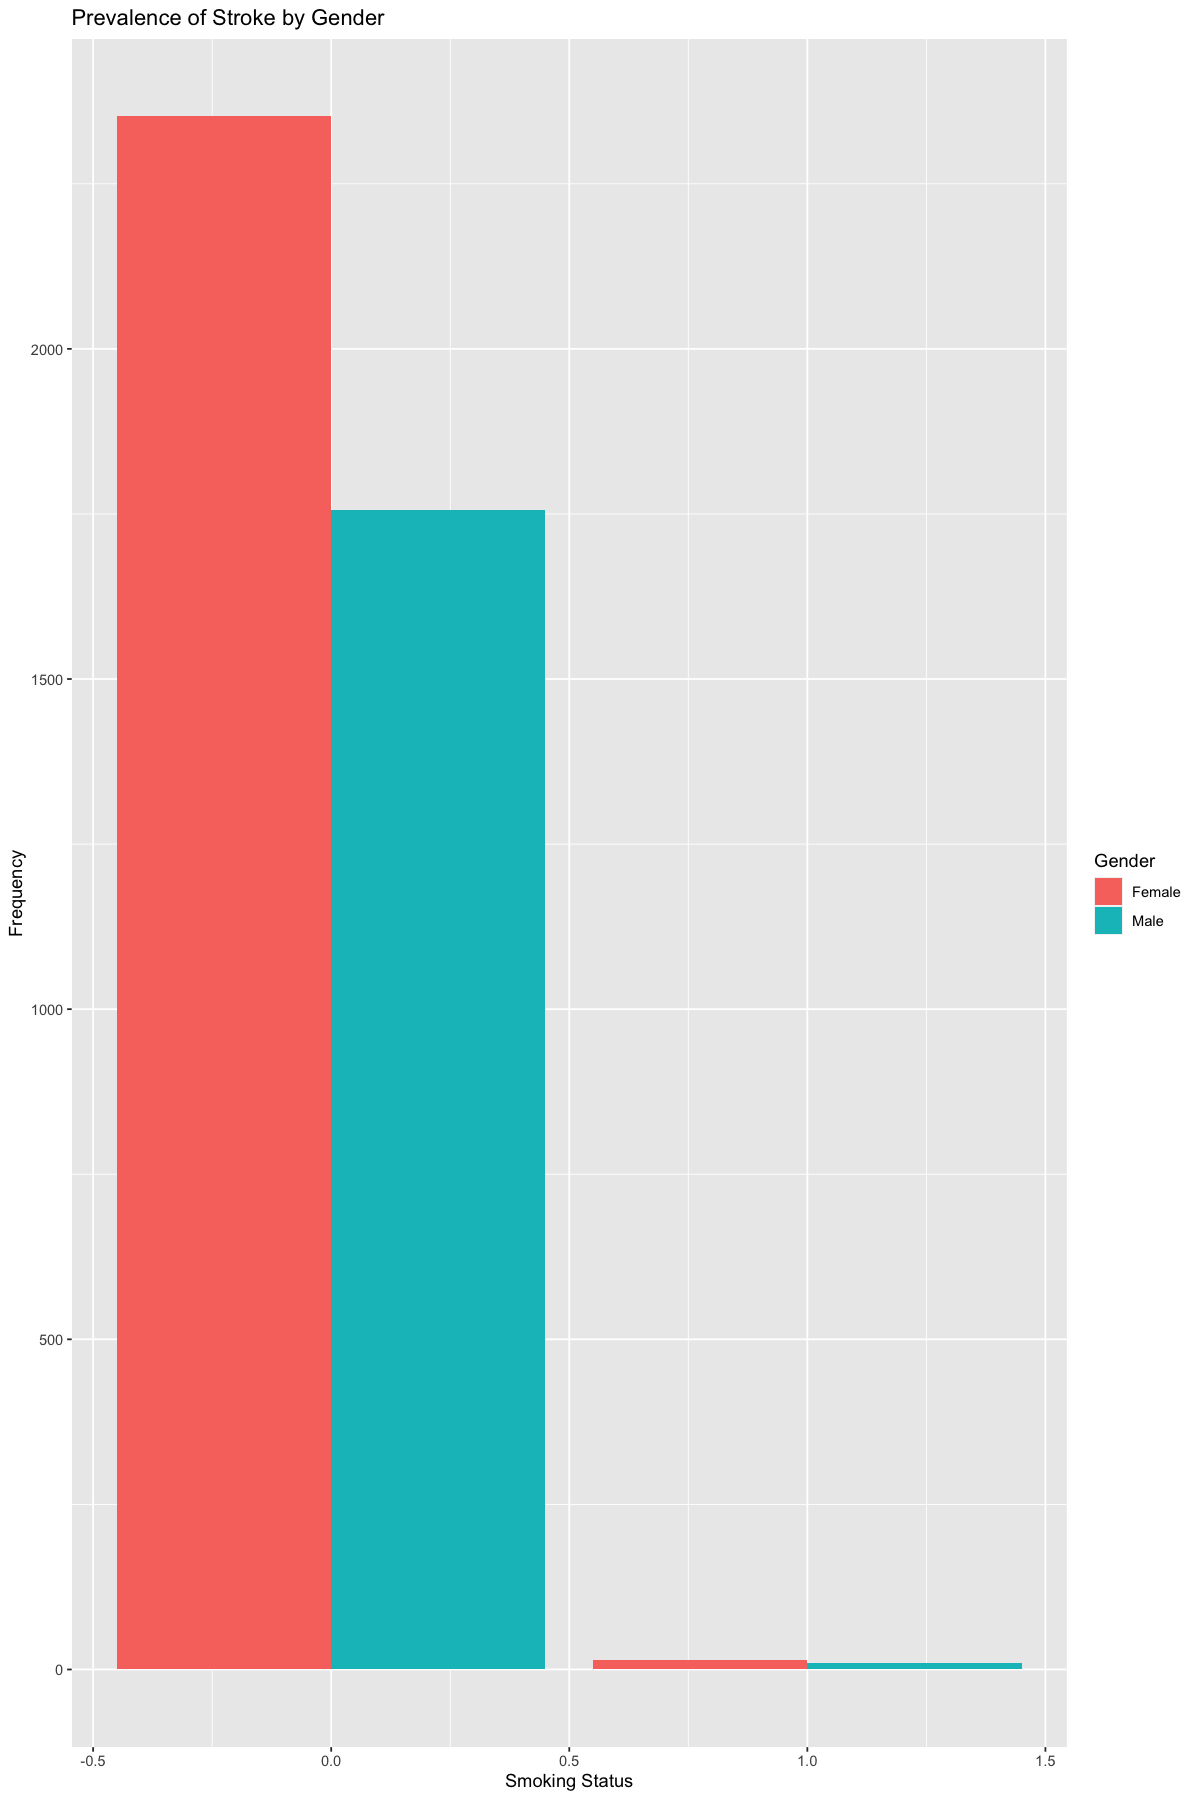

In [22]:
options(repr.plot.width=10, repr.plot.height=15)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = prevalentStroke, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Prevalence of Stroke by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

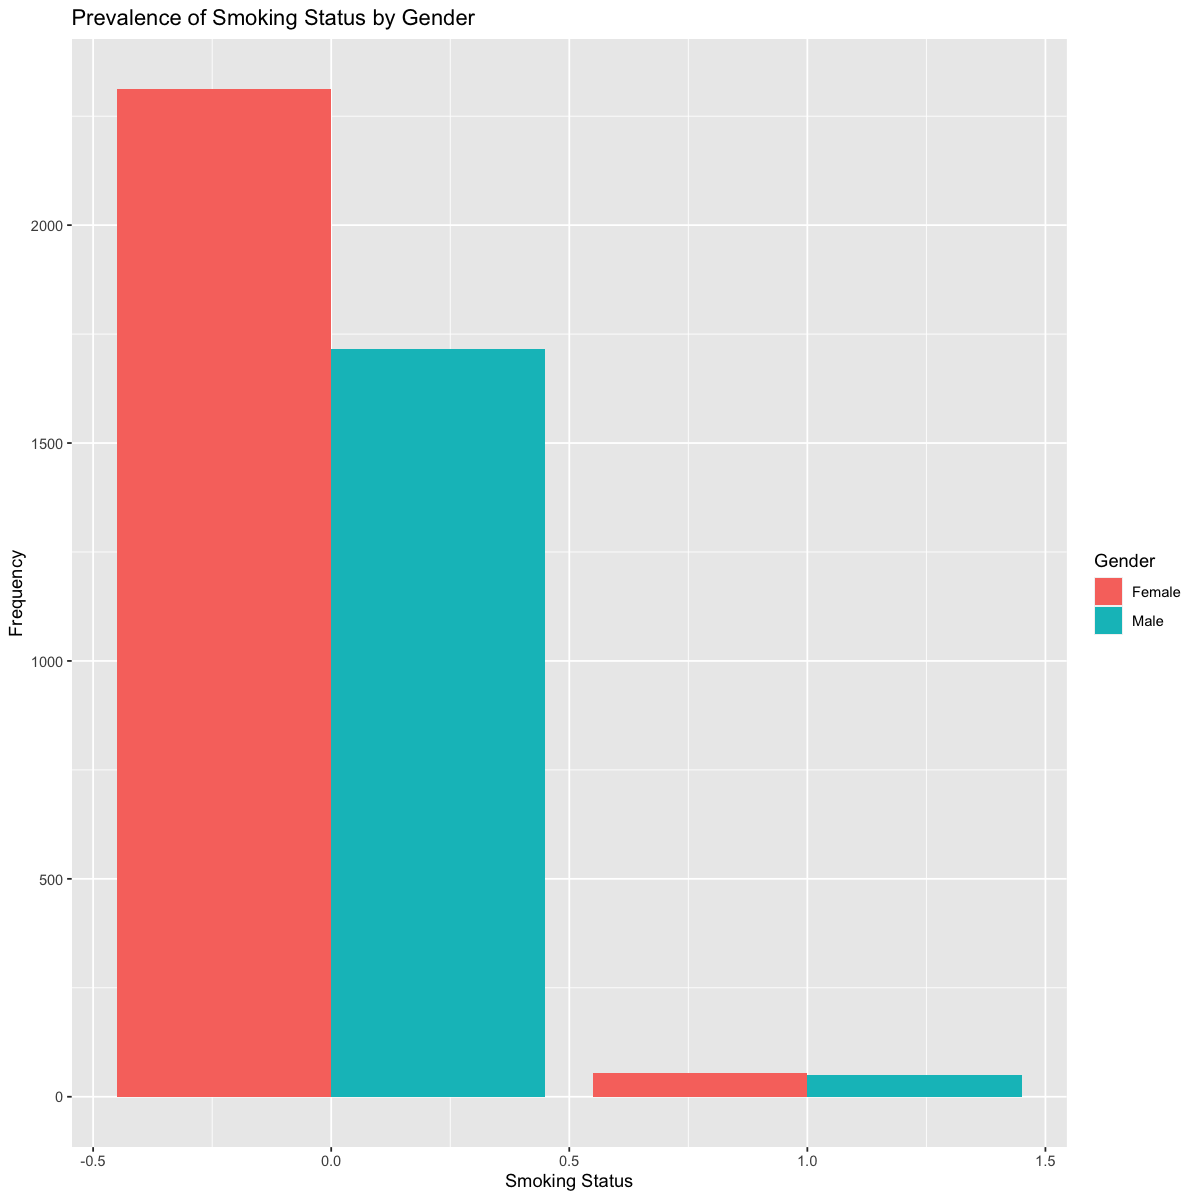

In [23]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data = kgheart) + geom_bar(mapping = aes(x = diabetes, fill = as.factor(male)), position = "dodge") + 
  ggtitle("Prevalence of Smoking Status by Gender") +
  xlab("Smoking Status") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Female", "Male"))

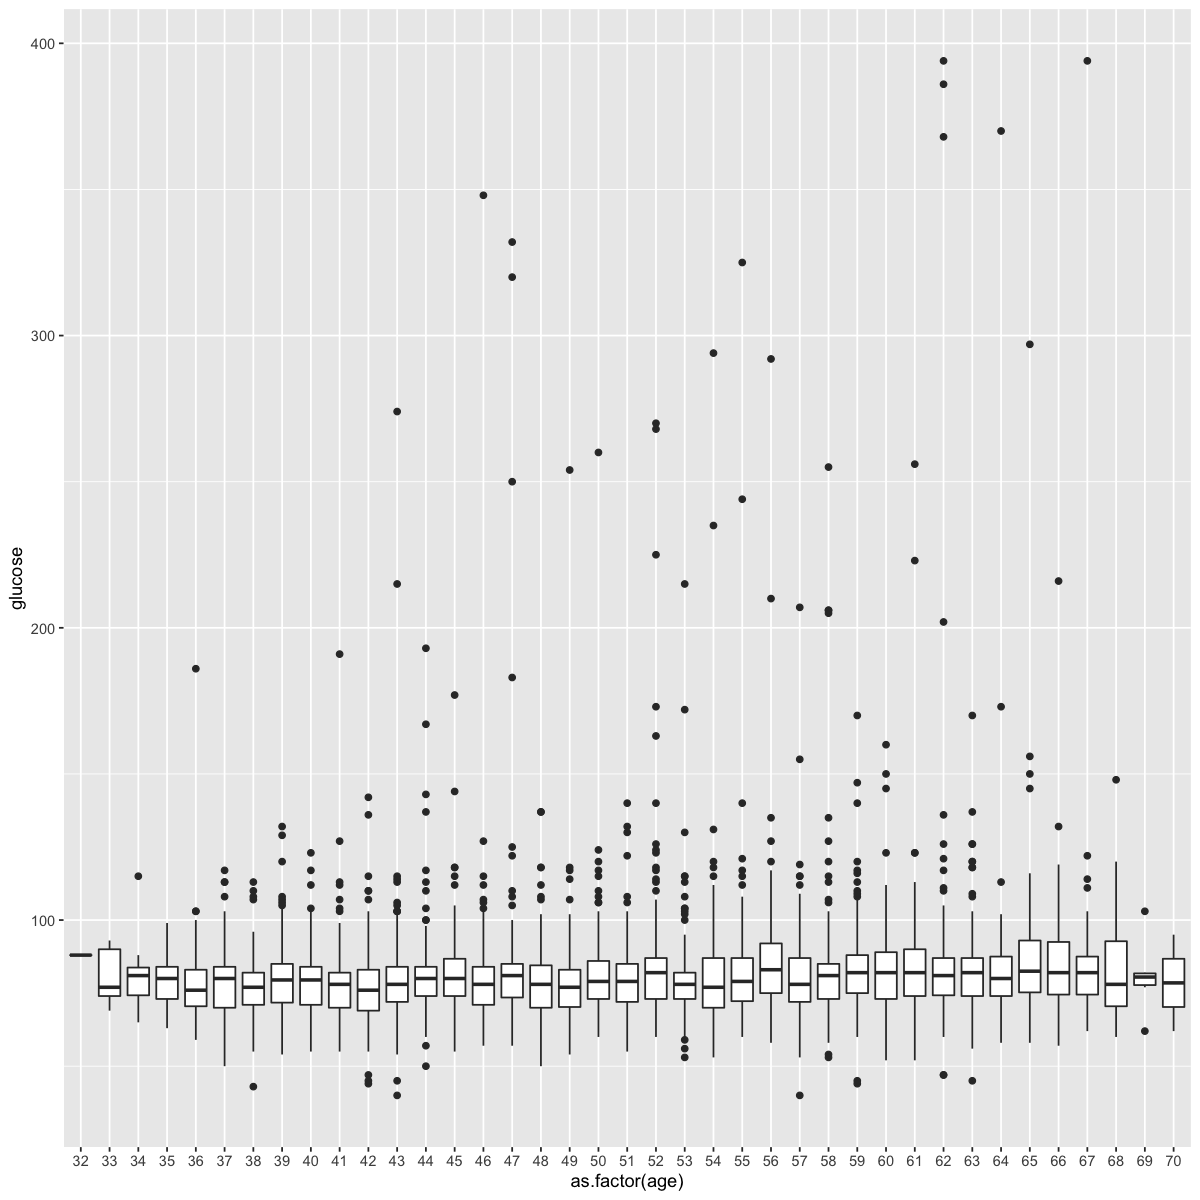

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(kgheart, aes(x=as.factor(age), y=glucose)) + geom_boxplot()

# <font color = blue> Statistical Analyses - Categorical IVs </font>
***
## Question setup
### _1. How do demographic and behavioral factors influence the risk for heart disease?_
* DV: __TenYearCHD__, categorical variable with 2 levels
* Categorical IVs: __*Independent Chi-Square*__ - Does the risk for heart disease vary by:
    * Gender (**male**), 2 levels?
    * __education__, 2 levels?
    * __currentSmoker__, 2 levels?
    
### _2. How do health metrics influence a diagnosis of heart disease?_
* DV: __TenYearCHD__, categorical variable with 2 levels
* Categorical IVs: __*Independent Chi-Square*__ - Does the risk for heart disease vary by:
    * __prevalentStroke__, 2 levels?
    * __prevalentHyp__, 2 levels?
    * __diabetes__, 2 levels?


## Load libraries

In [25]:
library(gmodels)

## Independent Chi-Square: __Gender__

In [26]:
CrossTable(kgheart$male, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

             | kgheart$TenYearCHD 
kgheart$male |        0  |        1  | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     2069  |      298  |     2367  | 
             | 2007.340  |  359.660  |           | 
             |    1.894  |   10.571  |           | 
             |   87.410% |   12.590% |   57.271% | 
             |   59.030% |   47.452% |           | 
             |   50.060% |    7.210% |           | 
             |    1.376  |   -3.251  |           | 
-------------|-----------|-----------|-----------|
           1 |     1436  |      330  |     1766  | 
             | 1497.660  |  268.340  |           | 
             |    2.539  |   14.169

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5, so this assumption is met 

### 2. Interpretation of the results
* _p_ value  = 6.62189e-08 (<.05)
* The test is significant, meaning that there is a significant difference in the 10 year risk for hear disease between genders

### 3. Post Hoc Analysis and Conclusions
* There are 2 standardized residuals > 2
* There were less women than expected with risk for heart disease
* There were more men than expected with risk for heart disease

### 4. Conclusion
* There is a statistically significant difference in the 10 year risk for heart disease between genders
* According to this data, being a male puts one at a higher risk for cardivascular disease

## Independent Chi-Square: __Education__

In [27]:
CrossTable(kgheart$education, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

                  | kgheart$TenYearCHD 
kgheart$education |        0  |        1  | Row Total | 
------------------|-----------|-----------|-----------|
                0 |     2503  |      470  |     2973  | 
                  | 2521.259  |  451.741  |           | 
                  |    0.132  |    0.738  |           | 
                  |   84.191% |   15.809% |   71.933% | 
                  |   71.412% |   74.841% |           | 
                  |   60.561% |   11.372% |           | 
                  |   -0.364  |    0.859  |           | 
------------------|-----------|-----------|-----------|
                1 |     1002  |      158  |     1160  | 
                  |  983.74

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5 - assumption is met 

### 2. Interpretation of the results
* _p_ value  = 0.07825598 (>.05), so the test is not significant
* According to this data, there seems to be no statistically significant relationship between the risk for heart disease and level of education

## Independent Chi-Square: __Smoking__

In [28]:
CrossTable(kgheart$currentSmoker, kgheart$TenYearCHD, fisher=TRUE, chisq = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  4133 

                      | kgheart$TenYearCHD 
kgheart$currentSmoker |        0  |        1  | Row Total | 
----------------------|-----------|-----------|-----------|
                    0 |     1783  |      305  |     2088  | 
                      | 1770.733  |  317.267  |           | 
                      |    0.085  |    0.474  |           | 
                      |   85.393% |   14.607% |   50.520% | 
                      |   50.870% |   48.567% |           | 
                      |   43.141% |    7.380% |           | 
                      |    0.292  |   -0.689  |           | 
----------------------|-----------|-----------|-----------|
                    1 |     1722  |     

### 1. Checking Assumptions
* Data is independent, i.e. one observation per subject
* Expected values (frequencies) > 5 - assumption is met 

### 2. Interpretation of the results
* _p_ value  = 0.2877119 (>.05), so the test is not significant
* According to this data, there seems to be no statistically significant relationship between being a smoker or not and having risk for heart disease
* Please note that this has been proven to be scientifically incorrect, however the connection is not immedicately apparent in this data [[source: CDC](https://www.cdc.gov/tobacco/campaign/tips/diseases/heart-disease-stroke.html)]

# <font color = blue> __Statistical Analyses - Continuous Variables__ </font>
***
### 1. How do demographic and behavioral factors influence the risk for heart disease?

* DV: __TenYearCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __age__
    * __cigsPerDay__
    
### 2. How do health metrics influence a diagnosis of heart disease?
* DV: __TenYearCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __totChol__
    * __sysBP__
    * __diaBP__
    * __BMI__
    * __heartRate__
    * __glucose__
    
### _3. Data wrangling note:_
* DV must be recoded to 0/1s (not necessary in this case)

### Data Wrangling: Subset data to variables of interest

In [29]:
keep = c('age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD')
logitdf = kgheart[keep]

## Checking Assumptions

### 1. Age

#### Sample Size Assumption

In [30]:
mylogit_age = glm(TenYearCHD ~ age, data=logitdf, family="binomial")

In [31]:
probabilities_age = predict(mylogit_age, type = "response")
logitdf$Predicted_age = ifelse(probabilities_age > .5, 1, 0)

In [32]:
# Create confusion matrix
conf_mat_Predicted_age <- caret::confusionMatrix(as.factor(logitdf$Predicted_age), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_age

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_age), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [33]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [34]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_age/(1-probabilities_age))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



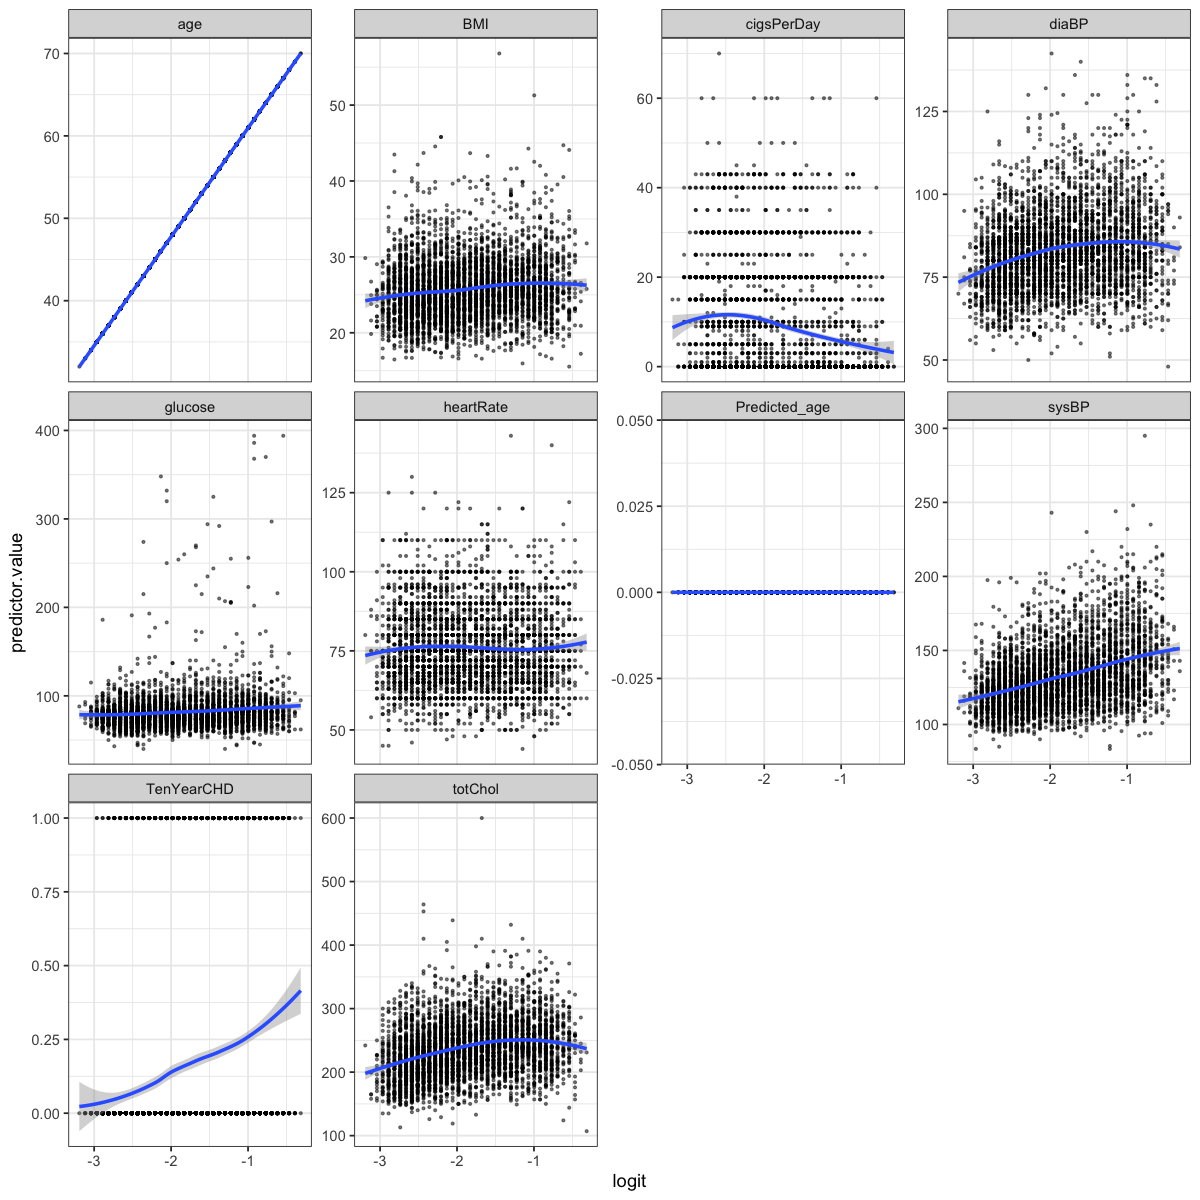

In [35]:
# Plotting to determine linearity
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 2. Cigarettes per Day

In [36]:
logitdf = kgheart[keep]
mylogit_cigsPerDay = glm(TenYearCHD ~ cigsPerDay, data=logitdf, family="binomial")

In [37]:
# Predict risk for heart disease
probabilities_cigsPerDay = predict(mylogit_cigsPerDay, type = "response")
logitdf$Predicted_cigsPerDay <- ifelse(probabilities_cigsPerDay > .5, 1, 0)

In [38]:
# Create confusion matrices
conf_mat_Predicted_cigsPerDay <- caret::confusionMatrix(as.factor(logitdf$Predicted_cigsPerDay), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_cigsPerDay 

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_cigsPerDay), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [39]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [40]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_cigsPerDay/(1-probabilities_cigsPerDay))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



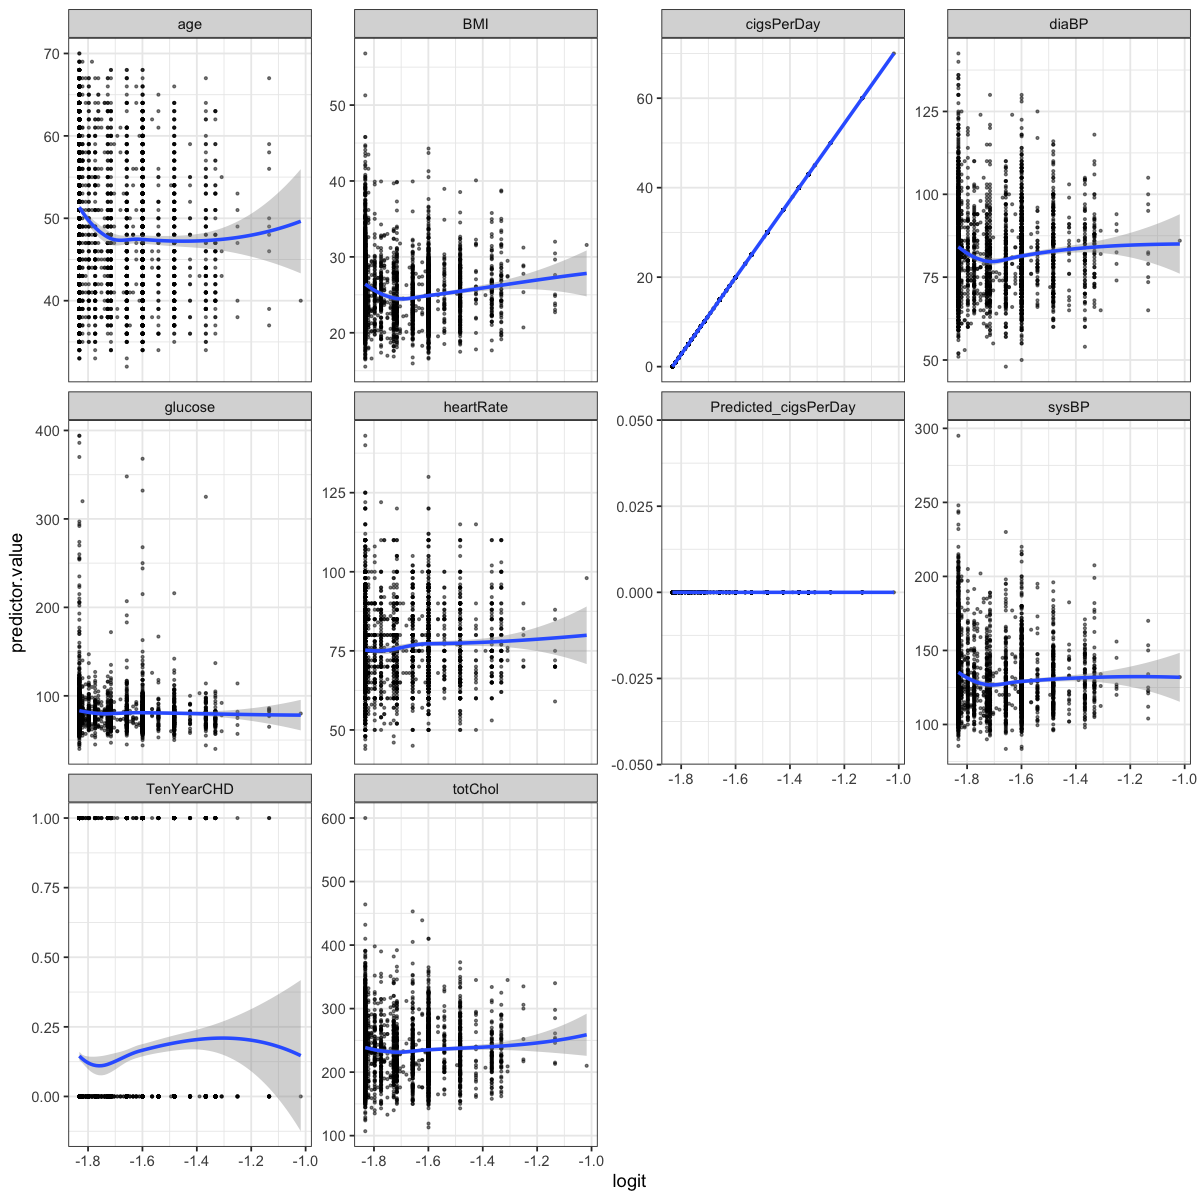

In [41]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 3. Total Cholesterol

In [42]:
logitdf = kgheart[keep]
mylogit_totChol = glm(TenYearCHD ~ totChol, data=logitdf, family="binomial")

In [43]:
# Predict risk for heart disease
probabilities_totChol = predict(mylogit_totChol, type = "response")
logitdf$Predicted_totChol <- ifelse(probabilities_totChol > .5, 1, 0)

In [44]:
# Create confusion matrices
conf_mat_Predicted_totChol <- caret::confusionMatrix(as.factor(logitdf$Predicted_totChol), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_totChol 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  627
         1    0    1
                                         
               Accuracy : 0.8483         
                 95% CI : (0.837, 0.8591)
    No Information Rate : 0.8481         
    P-Value [Acc > NIR] : 0.4934         
                                         
                  Kappa : 0.0027         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.000000       
            Specificity : 0.001592       
         Pos Pred Value : 0.848258       
         Neg Pred Value : 1.000000       
             Prevalence : 0.848052       
         Detection Rate : 0.848052       
   Detection Prevalence : 0.999758       
      Balanced Accuracy : 0.500796       
                                         
       'Positive' Class : 0              
                                         

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [45]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [46]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_totChol/(1-probabilities_totChol))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



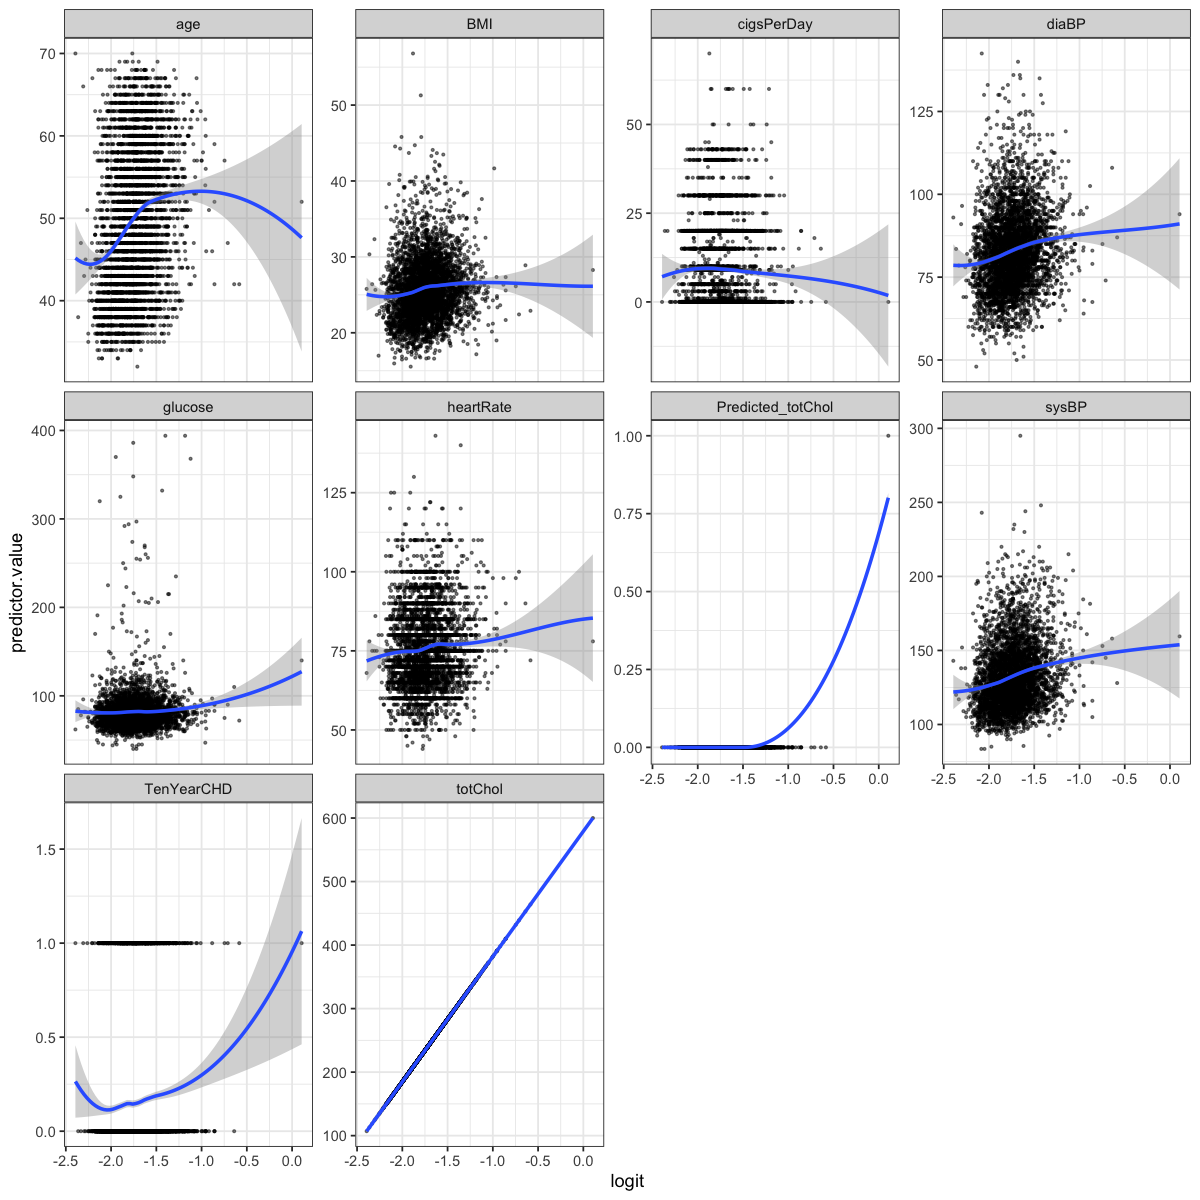

In [47]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 4. Systolic Blood Pressure

In [48]:
logitdf = kgheart[keep]
mylogit_sysBP = glm(TenYearCHD ~ sysBP, data=logitdf, family="binomial")

In [49]:
# Predict risk for heart disease
probabilities_sysBP = predict(mylogit_sysBP, type = "response")
logitdf$Predicted_sysBP <- ifelse(probabilities_sysBP > .5, 1, 0)

In [50]:
# Create confusion matrices
conf_mat_Predicted_sysBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_sysBP), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_sysBP

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3495  614
         1   10   14
                                          
               Accuracy : 0.849           
                 95% CI : (0.8377, 0.8598)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.4417          
                                          
                  Kappa : 0.0321          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99715         
            Specificity : 0.02229         
         Pos Pred Value : 0.85057         
         Neg Pred Value : 0.58333         
             Prevalence : 0.84805         
         Detection Rate : 0.84563         
   Detection Prevalence : 0.99419         
      Balanced Accuracy : 0.50972         
                                          
       'Positive' Class : 0               
                        

__*All cells that are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [51]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [52]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_sysBP/(1-probabilities_sysBP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



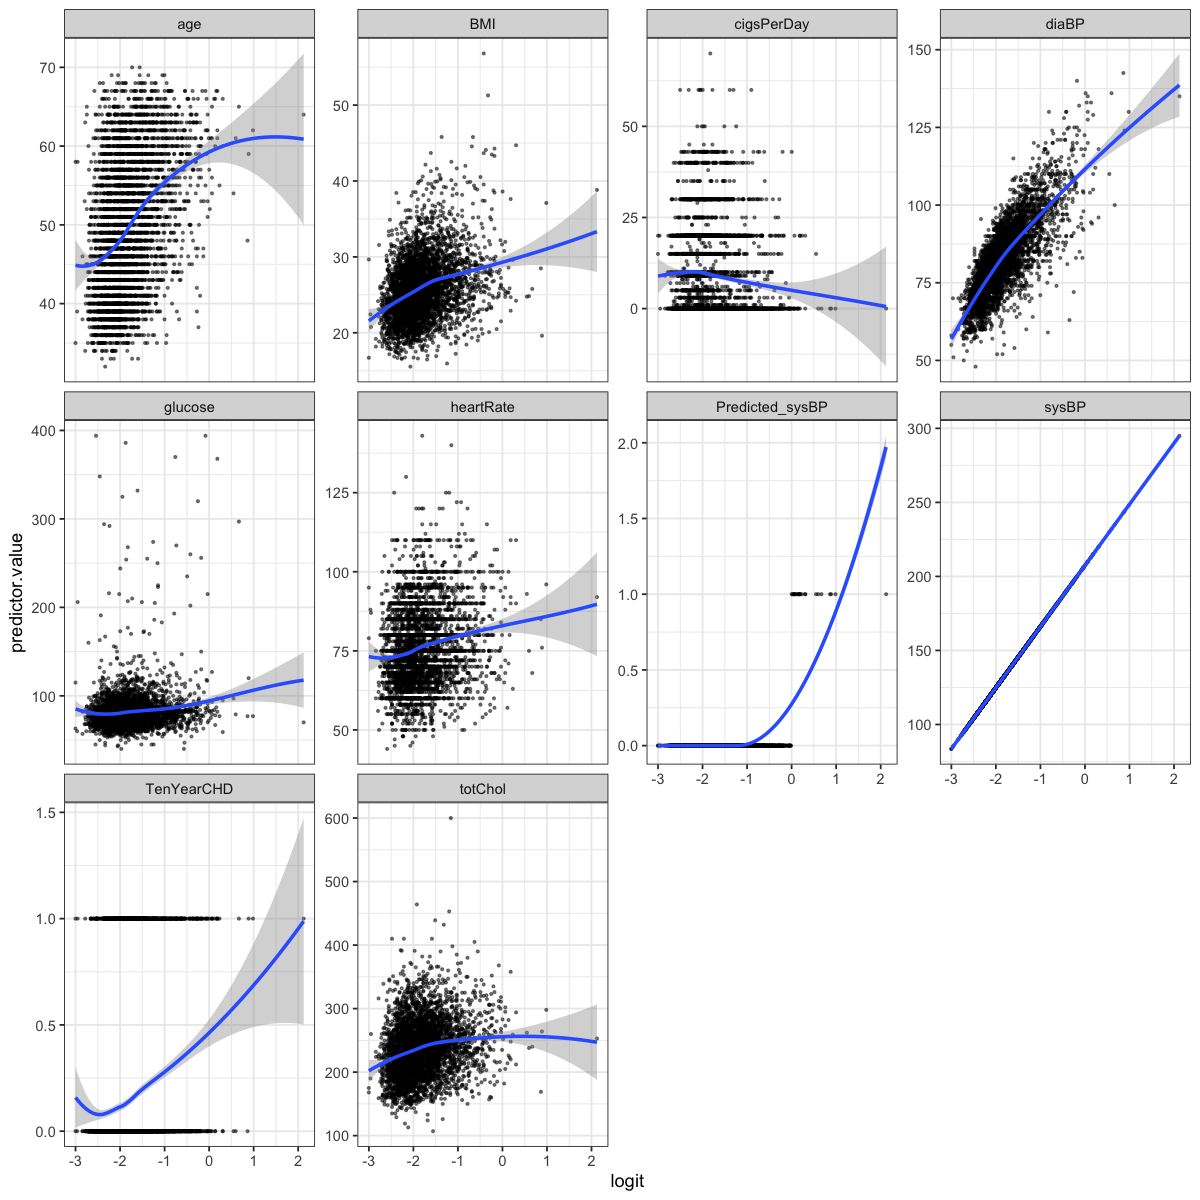

In [53]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 5. Diastolic Blood Pressure

In [54]:
logitdf = kgheart[keep]
mylogit_diaBP = glm(TenYearCHD ~ diaBP, data=logitdf, family="binomial")

In [55]:
# Predict risk for heart disease
probabilities_diaBP = predict(mylogit_diaBP, type = "response")
logitdf$Predicted_diaBP <- ifelse(probabilities_diaBP > .5, 1, 0)

In [56]:
# Create confusion matrices
conf_mat_Predicted_diaBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_diaBP), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_diaBP 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3504  627
         1    1    1
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0.0022          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999715        
            Specificity : 0.001592        
         Pos Pred Value : 0.848221        
         Neg Pred Value : 0.500000        
             Prevalence : 0.848052        
         Detection Rate : 0.847810        
   Detection Prevalence : 0.999516        
      Balanced Accuracy : 0.500654        
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [57]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [58]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_diaBP/(1-probabilities_diaBP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



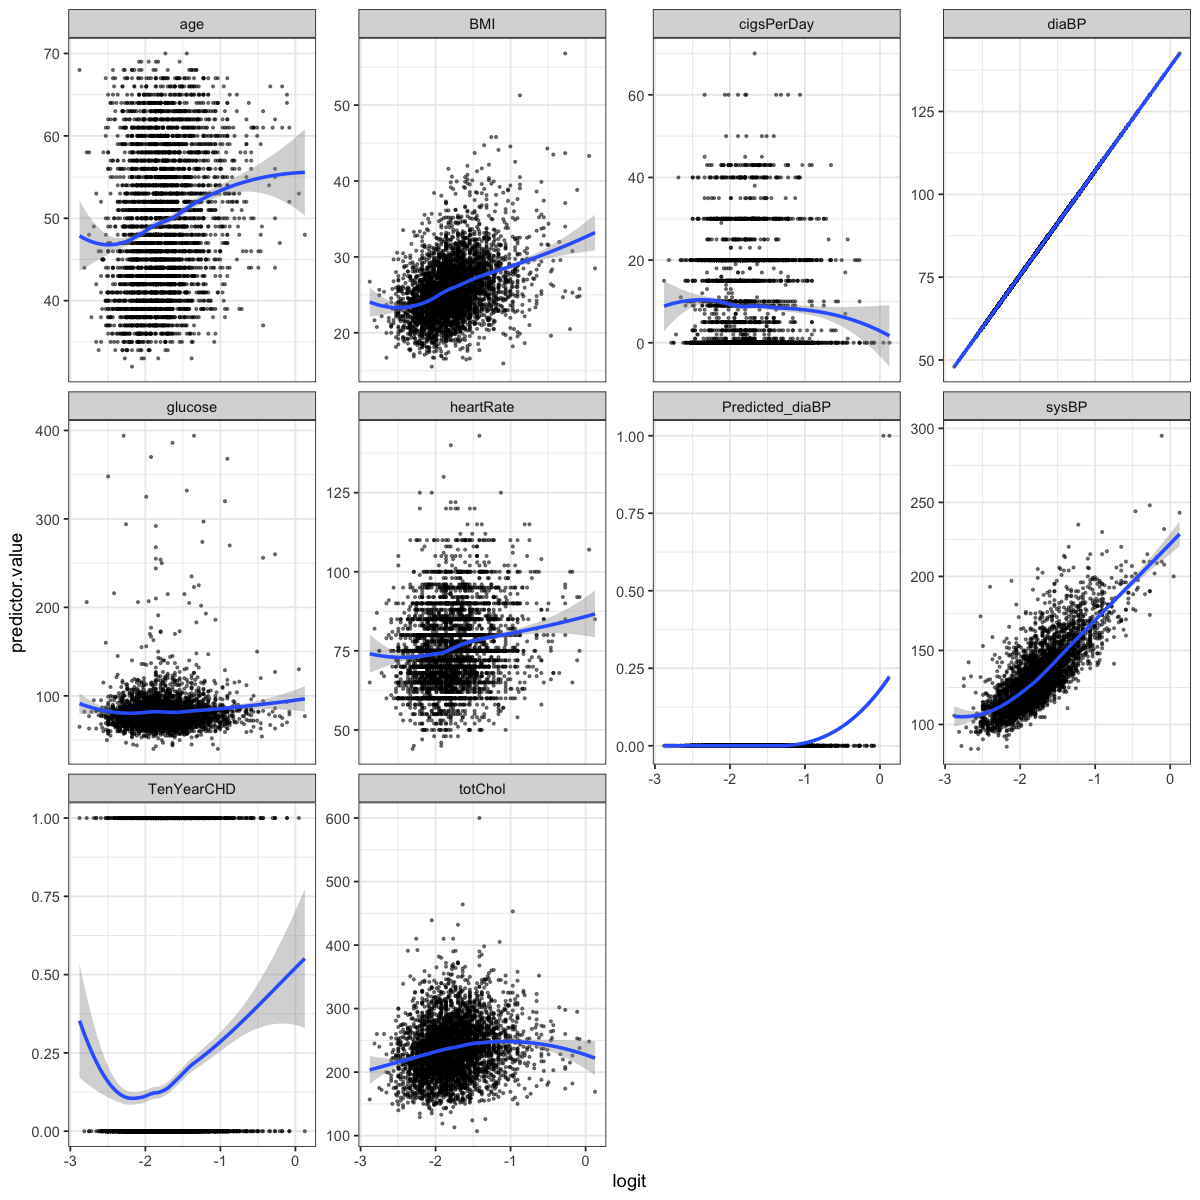

In [59]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 6. BMI

In [60]:
logitdf = kgheart[keep]
mylogit_BMI = glm(TenYearCHD ~ BMI, data=logitdf, family="binomial")

In [61]:
# Predict risk for heart disease
probabilities_BMI = predict(mylogit_BMI, type = "response")
logitdf$Predicted_BMI <- ifelse(probabilities_BMI > .5, 1, 0)

In [62]:
# Create confusion matrix
conf_mat_Predicted_BMI <- caret::confusionMatrix(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_BMI

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [63]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [64]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_BMI/(1-probabilities_BMI))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



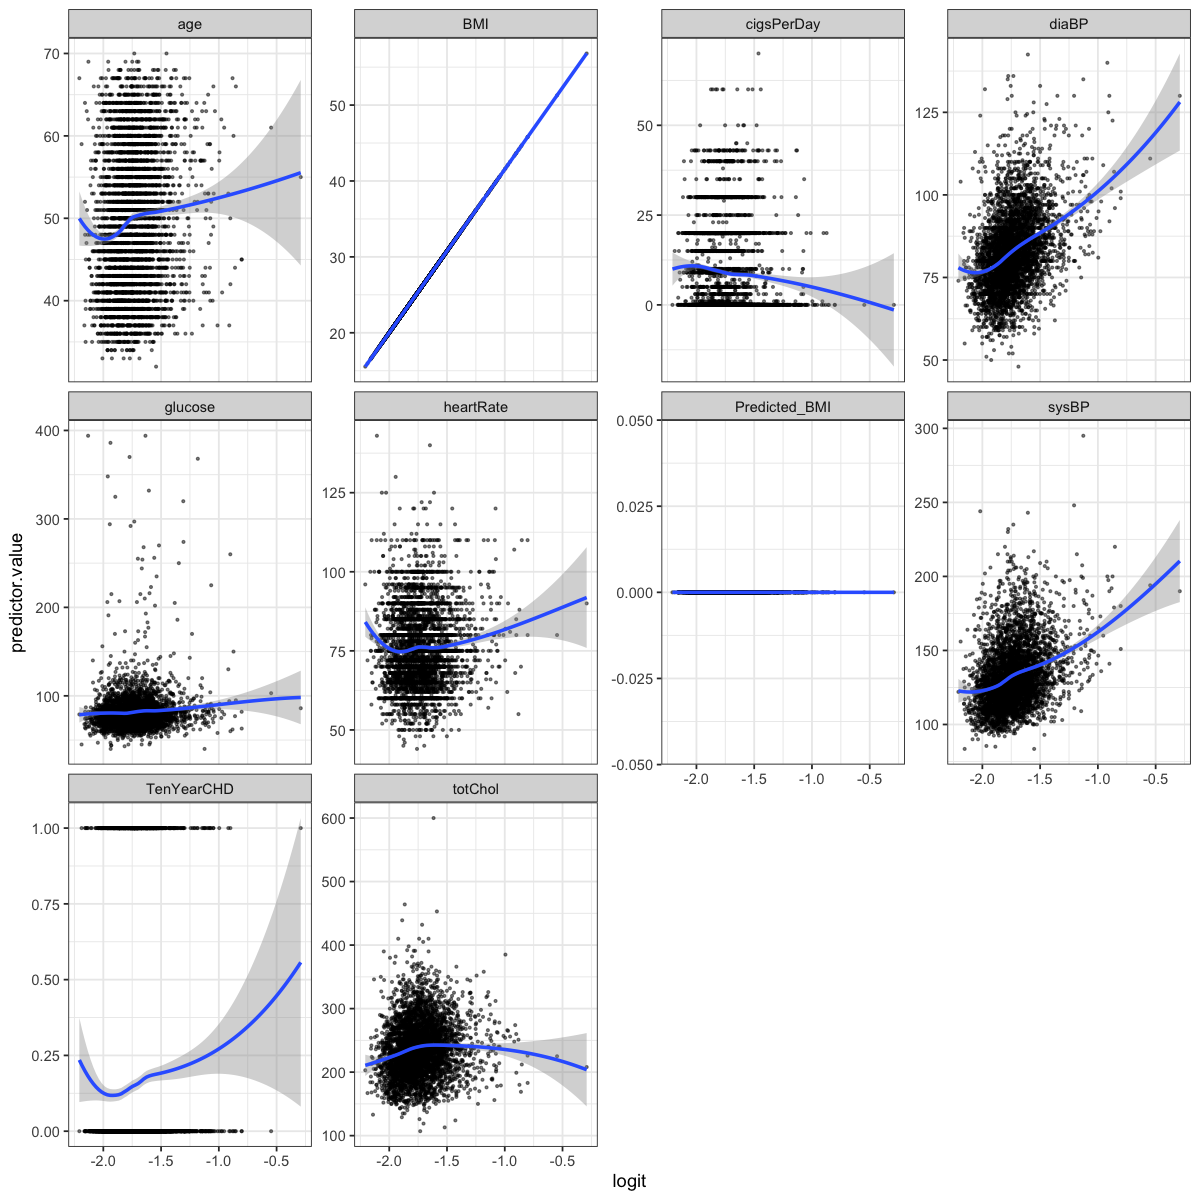

In [65]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 7. Heart Rate

In [66]:
logitdf = kgheart[keep]
mylogit_heartRate = glm(TenYearCHD ~ heartRate, data=logitdf, family="binomial")

In [67]:
# Predict risk for heart disease
probabilities_heartRate = predict(mylogit_heartRate, type = "response")
logitdf$Predicted_heartRate <- ifelse(probabilities_heartRate > .5, 1, 0)

In [68]:
# Create confusion matrices
conf_mat_Predicted_heartRate <- caret::confusionMatrix(as.factor(logitdf$Predicted_heartRate ), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_heartRate

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_heartRate), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [69]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [70]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_heartRate/(1-probabilities_heartRate))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



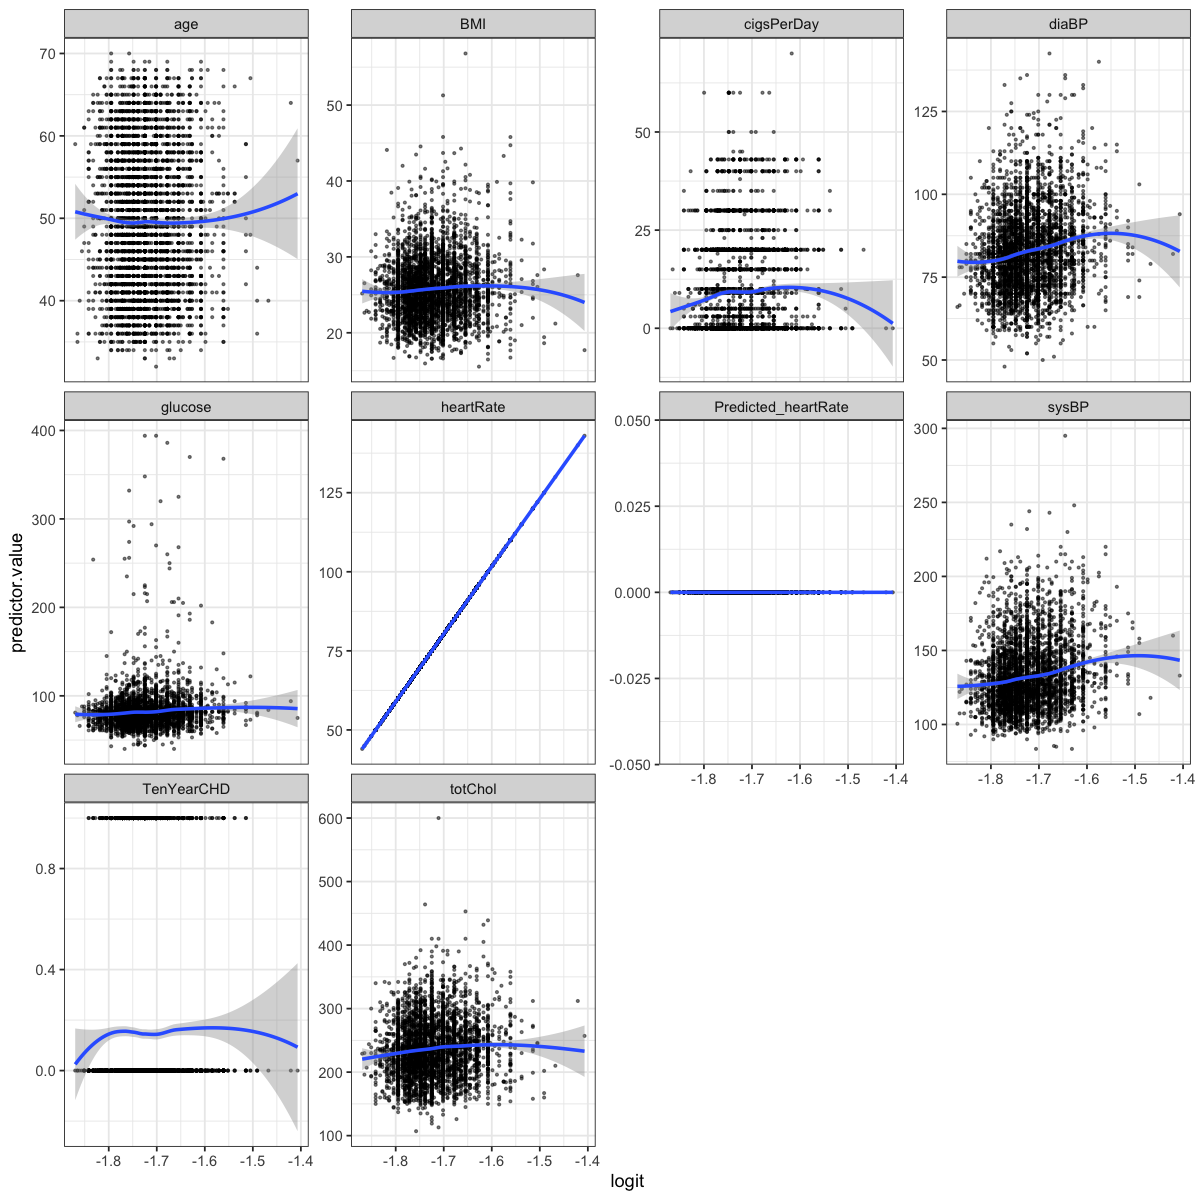

In [71]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 8. Glucose

In [72]:
logitdf = kgheart[keep]
mylogit_glucose = glm(TenYearCHD ~ glucose, data=logitdf, family="binomial")

In [73]:
# Predict risk for heart disease
probabilities_glucose = predict(mylogit_glucose, type = "response")
logitdf$Predicted_glucose <- ifelse(probabilities_glucose > .5, 1, 0)

In [74]:
# Create confusion matrices
conf_mat_Predicted_glucose <- caret::confusionMatrix(as.factor(logitdf$Predicted_glucose), as.factor(logitdf$TenYearCHD))
conf_mat_Predicted_glucose

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3499  614
         1    6   14
                                          
               Accuracy : 0.85            
                 95% CI : (0.8387, 0.8607)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.3743          
                                          
                  Kappa : 0.0342          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99829         
            Specificity : 0.02229         
         Pos Pred Value : 0.85072         
         Neg Pred Value : 0.70000         
             Prevalence : 0.84805         
         Detection Rate : 0.84660         
   Detection Prevalence : 0.99516         
      Balanced Accuracy : 0.51029         
                                          
       'Positive' Class : 0               
                        

__*All cells  are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [75]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [76]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_glucose/(1-probabilities_glucose))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



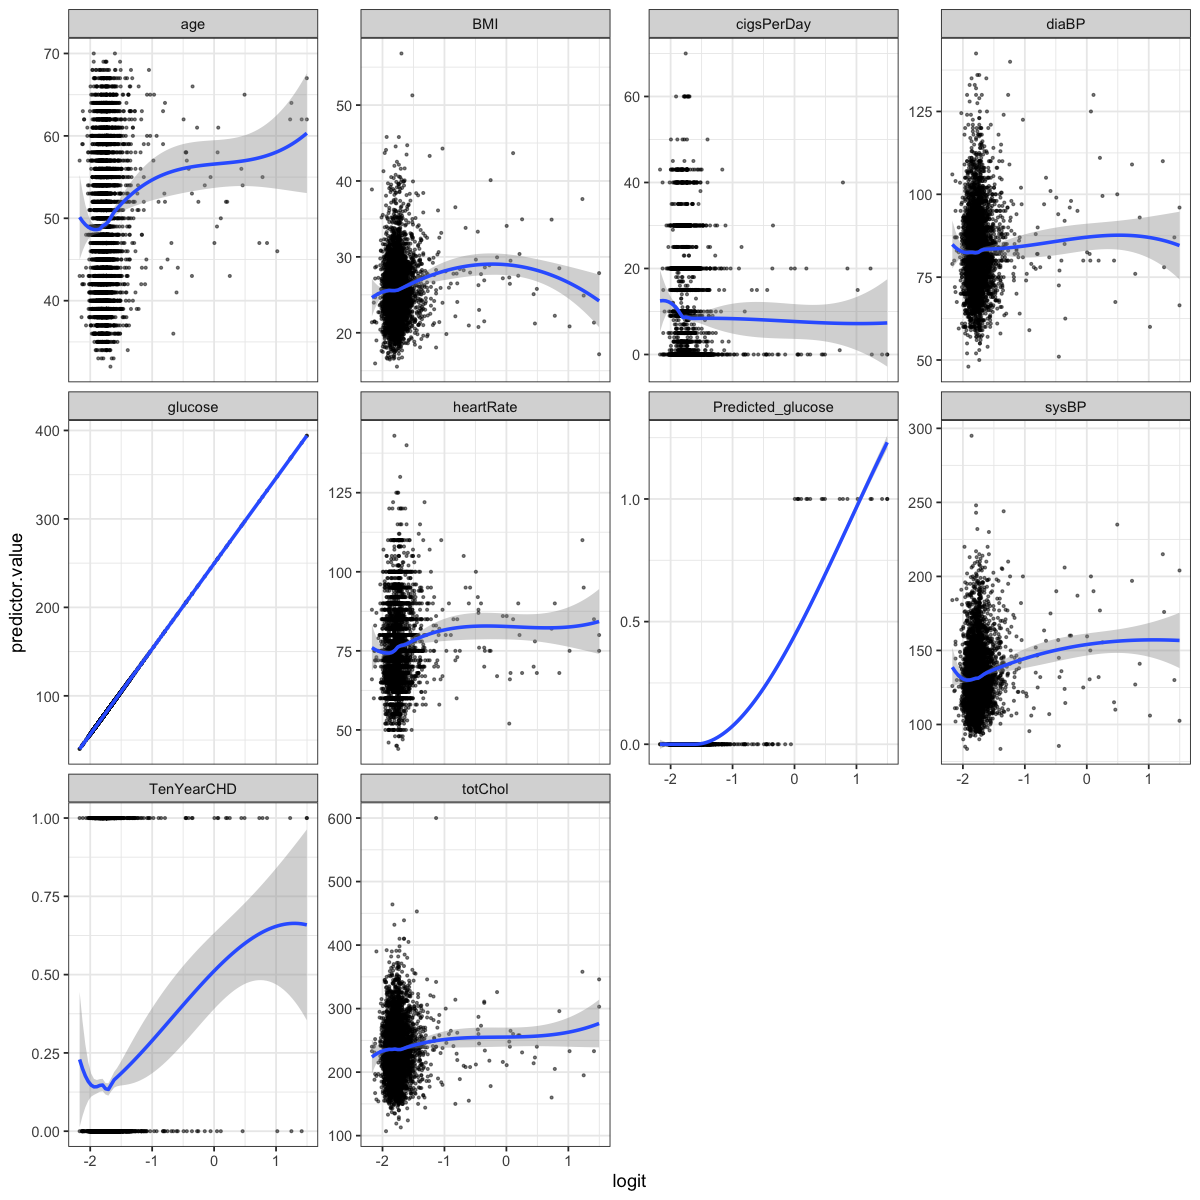

In [77]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

*All of the variables that meet the logit linearity (with TenYearCHD) assumption except __diaBP__, which has a pronounced curved in the TenYearCHD graph.*

### Independent Errors Assumption

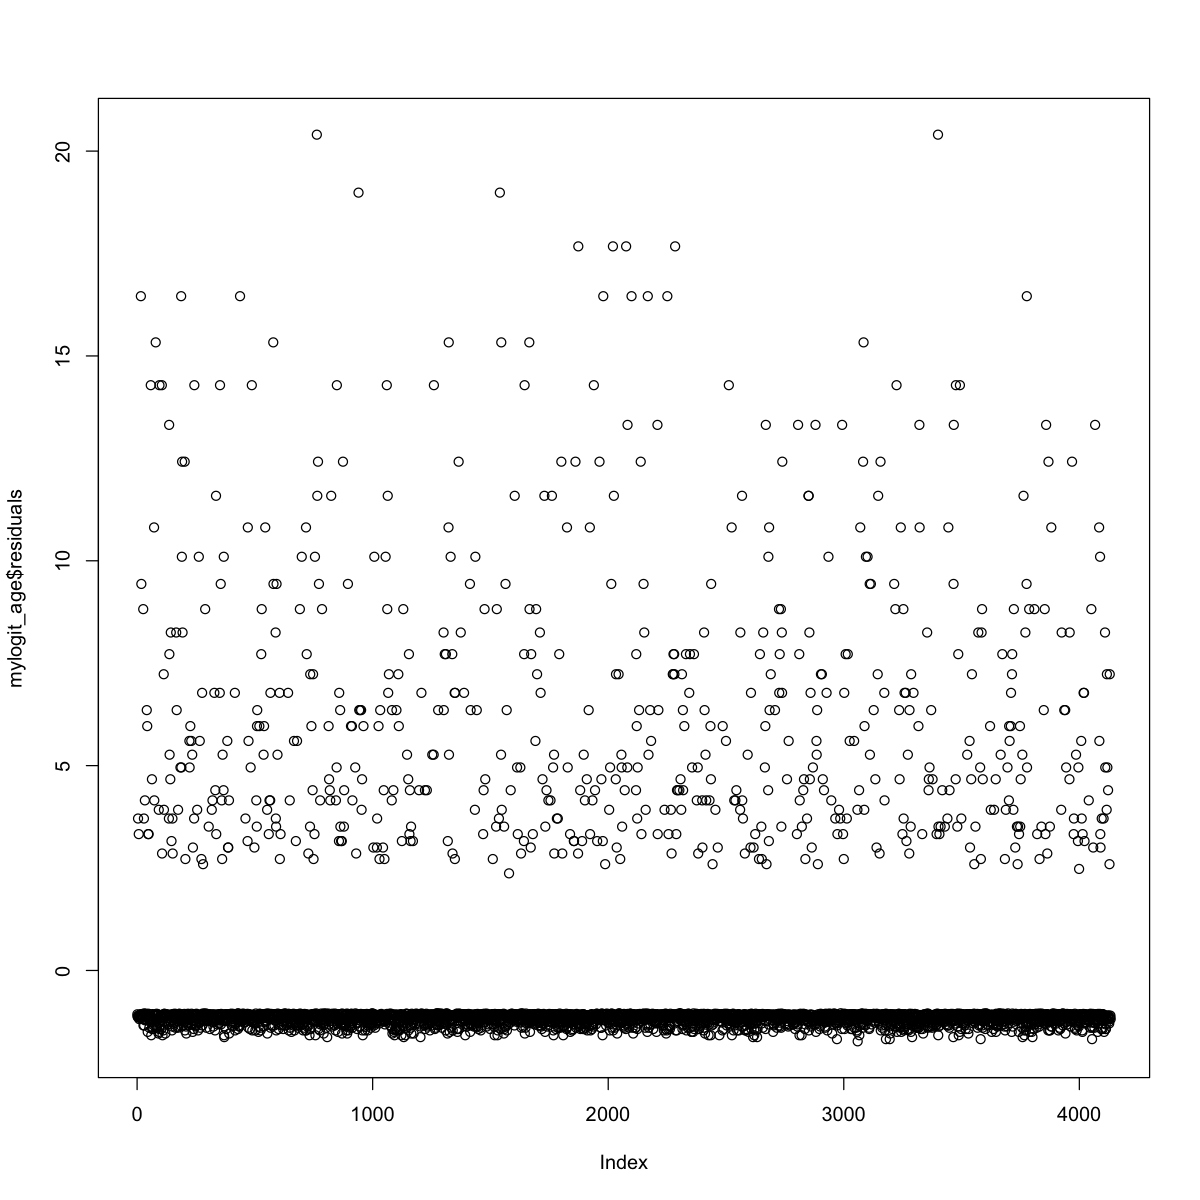

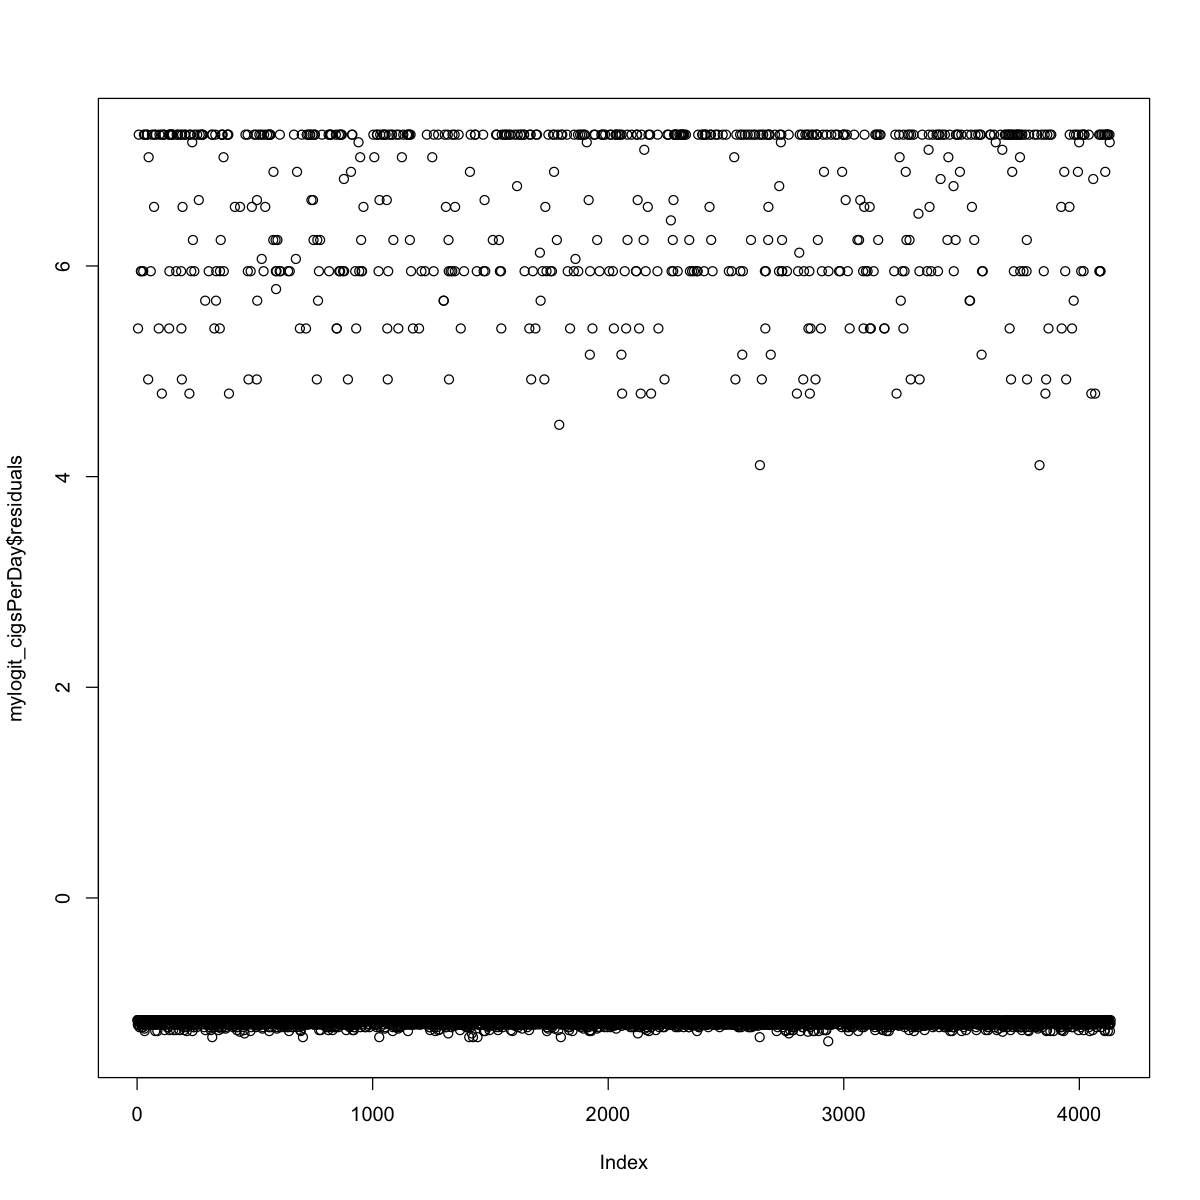

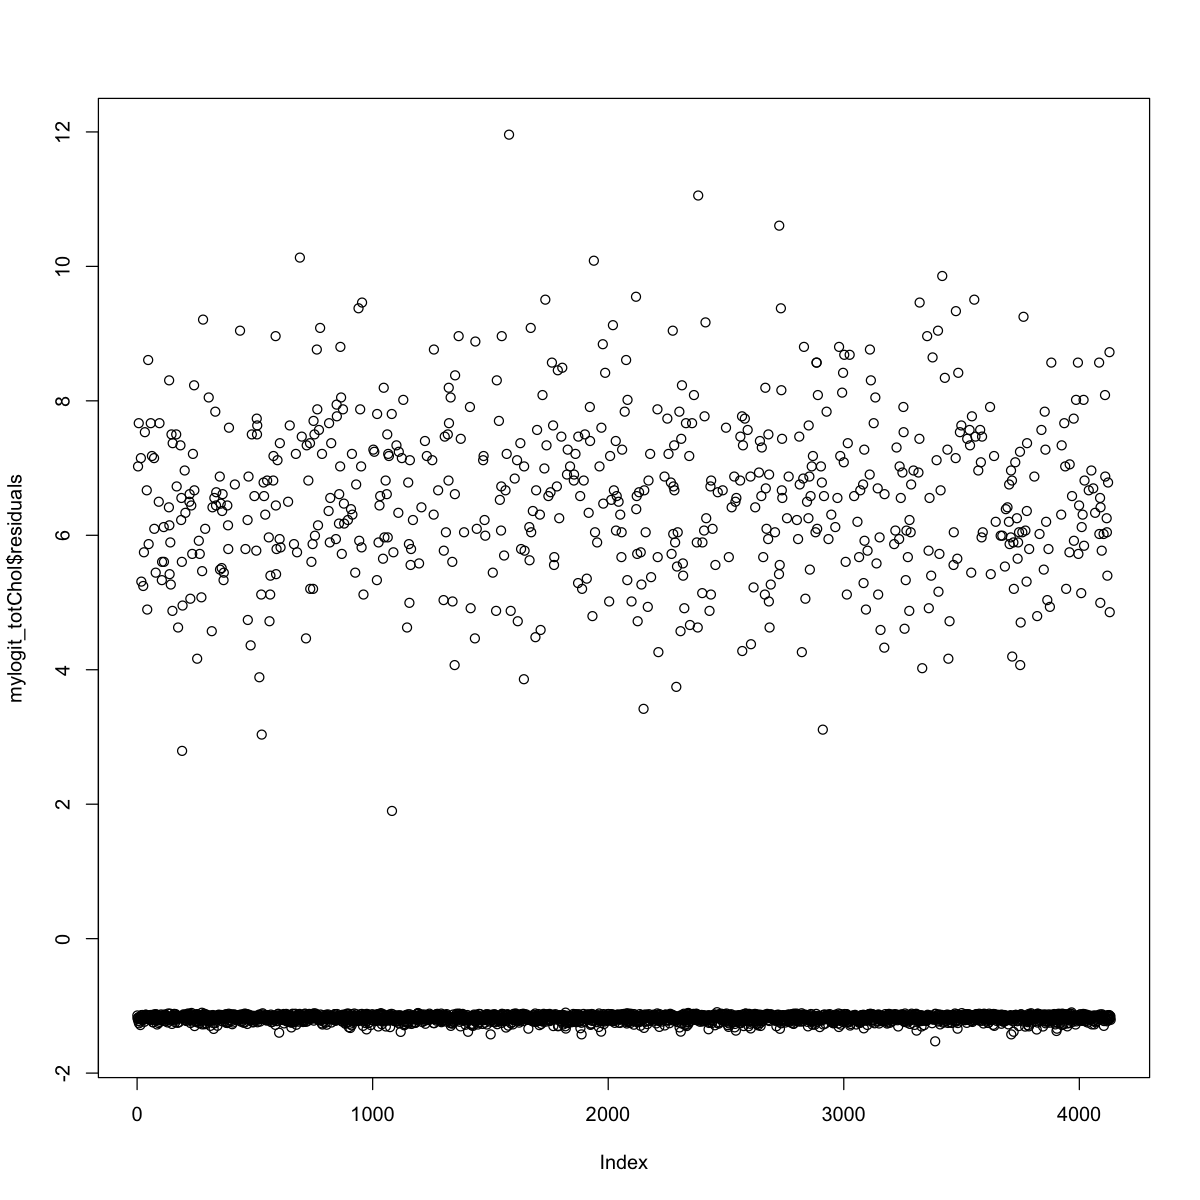

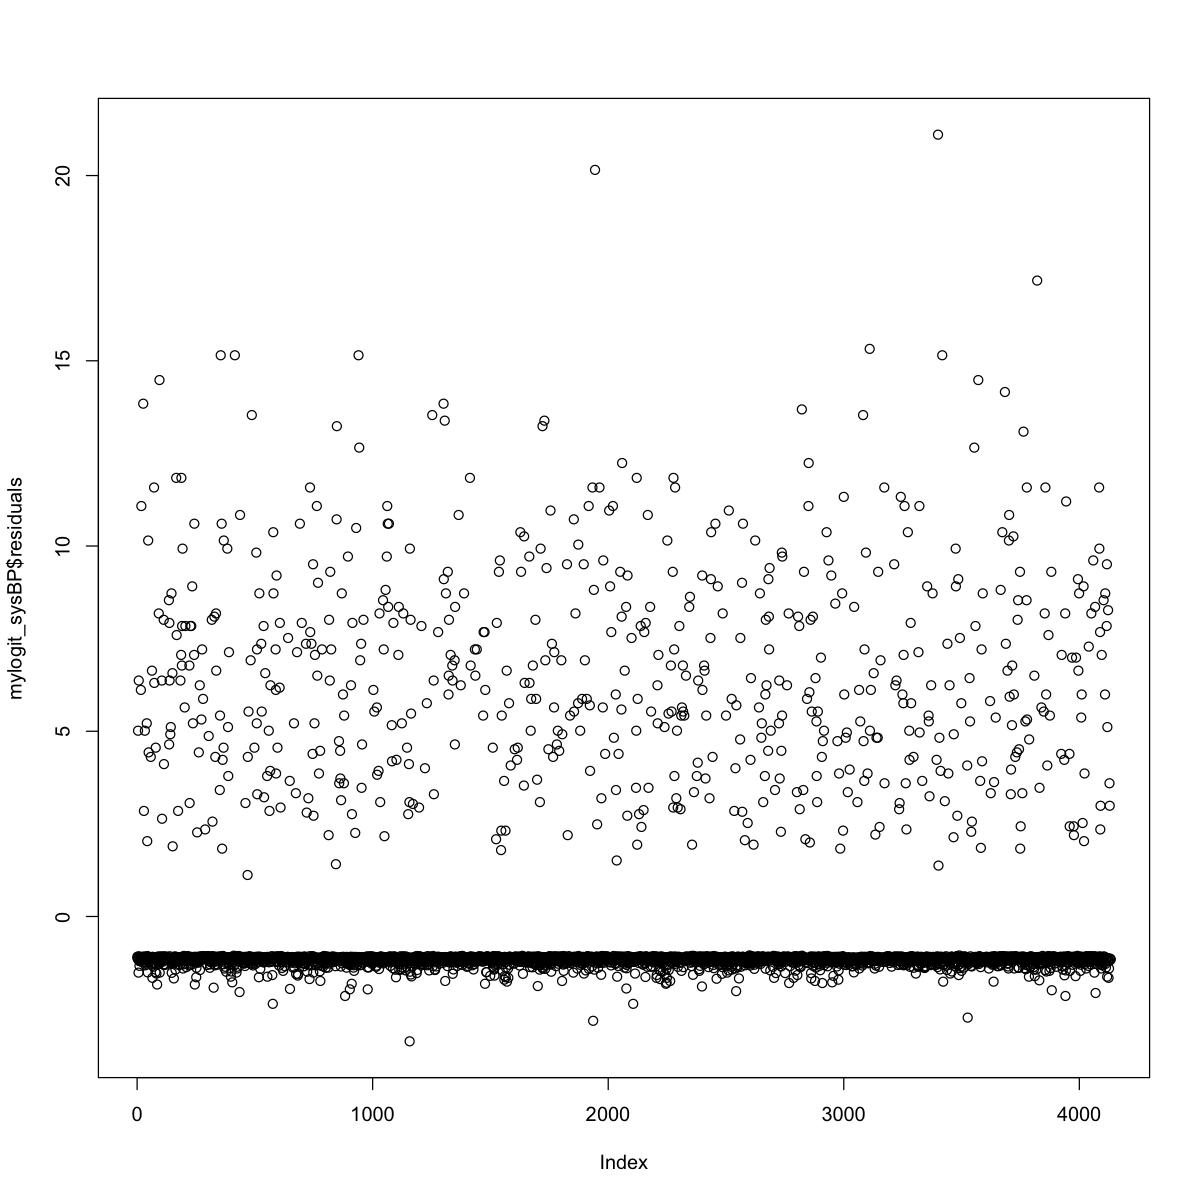

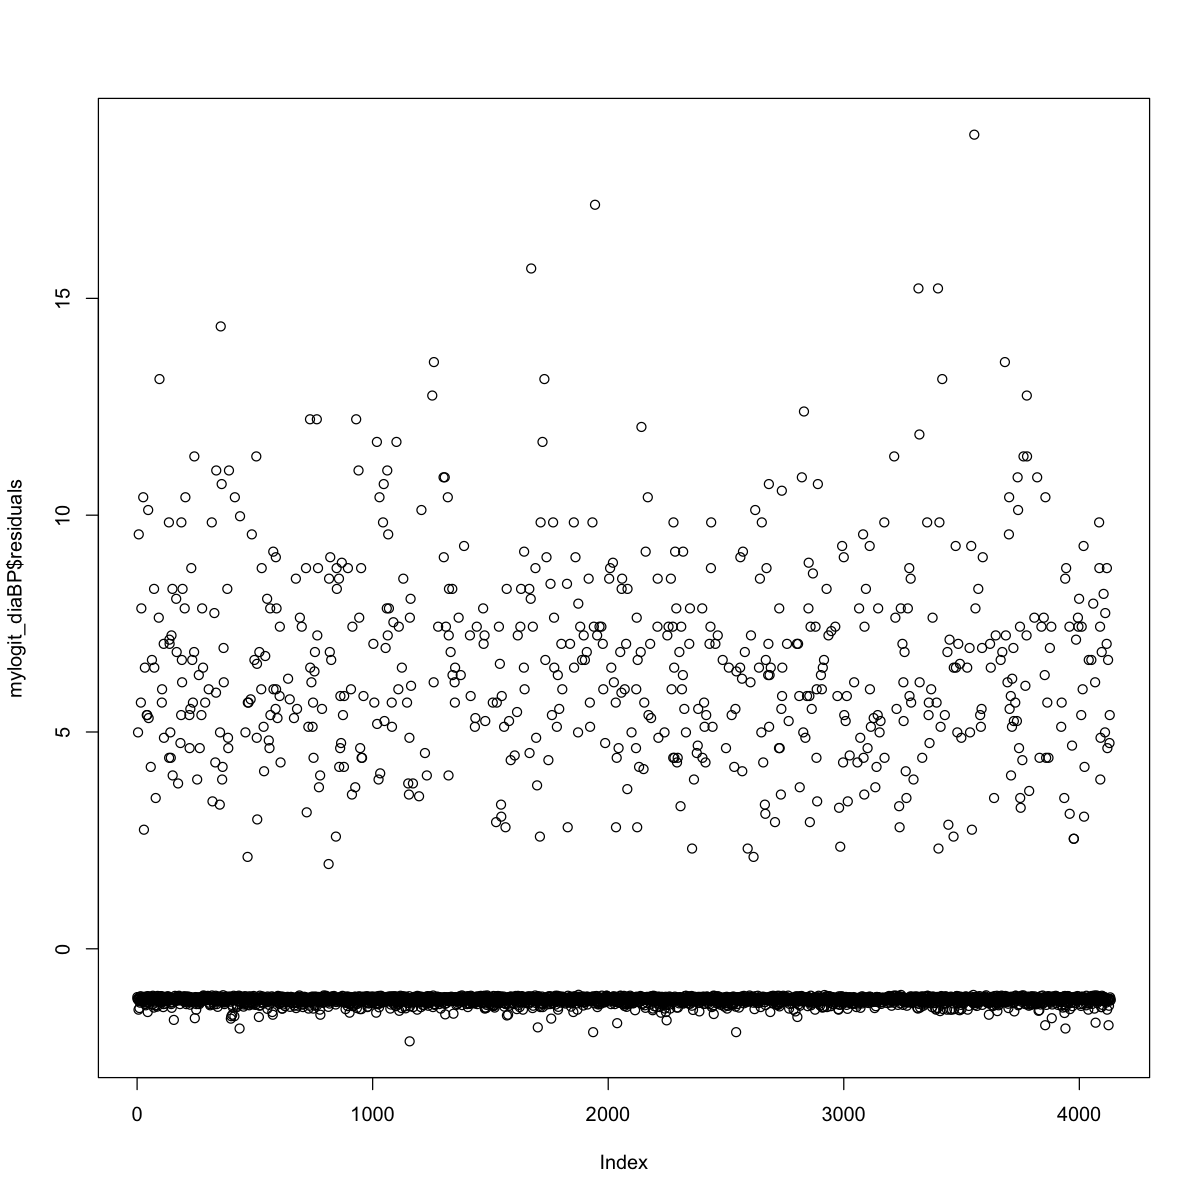

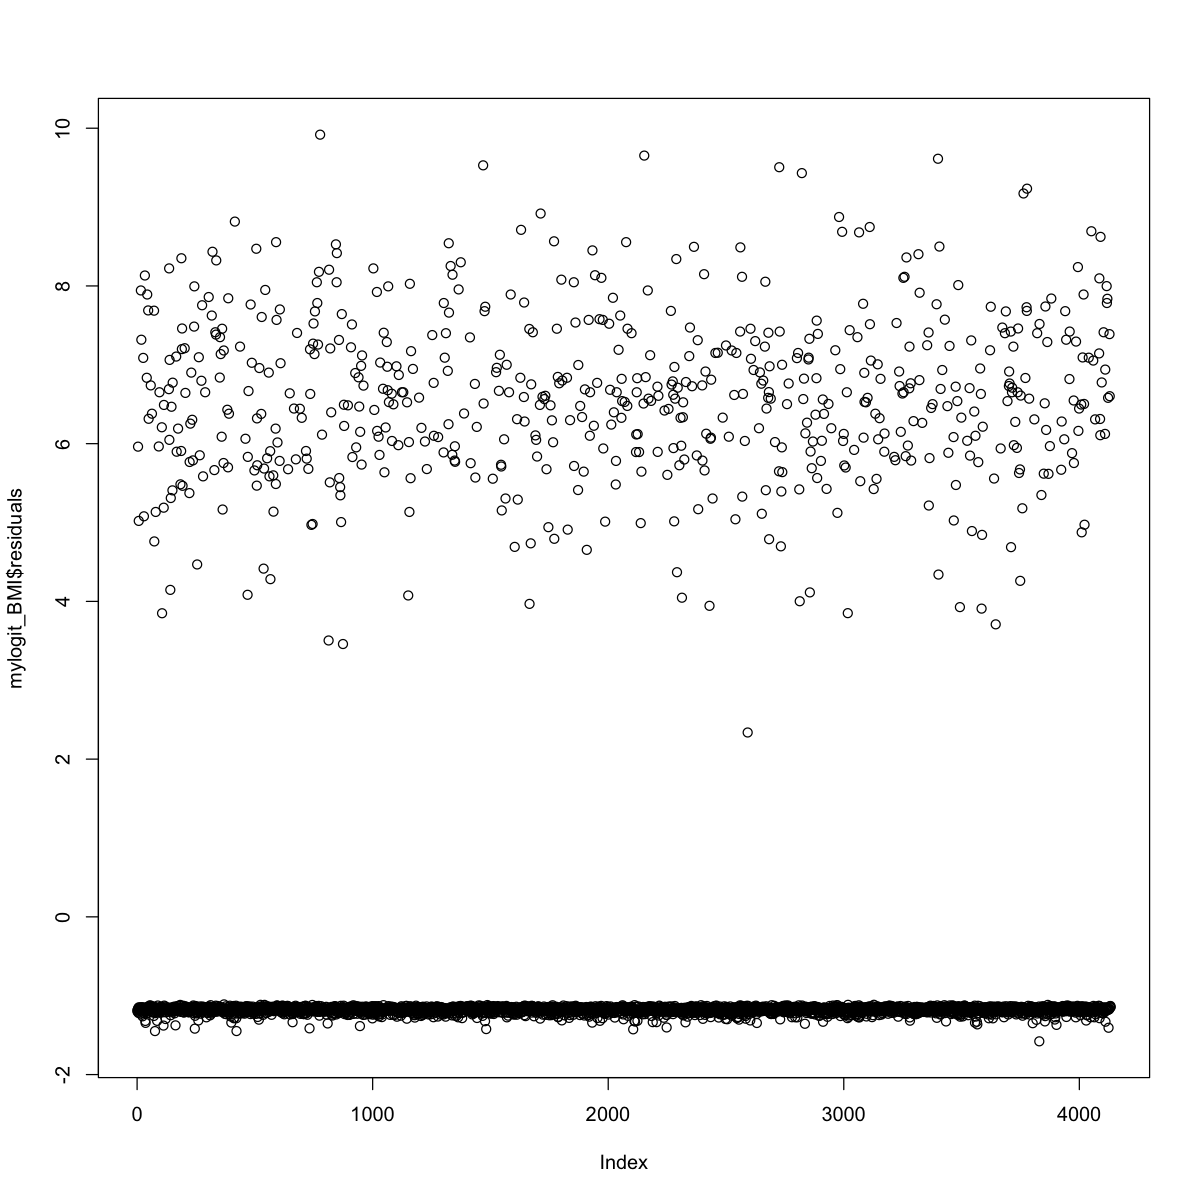

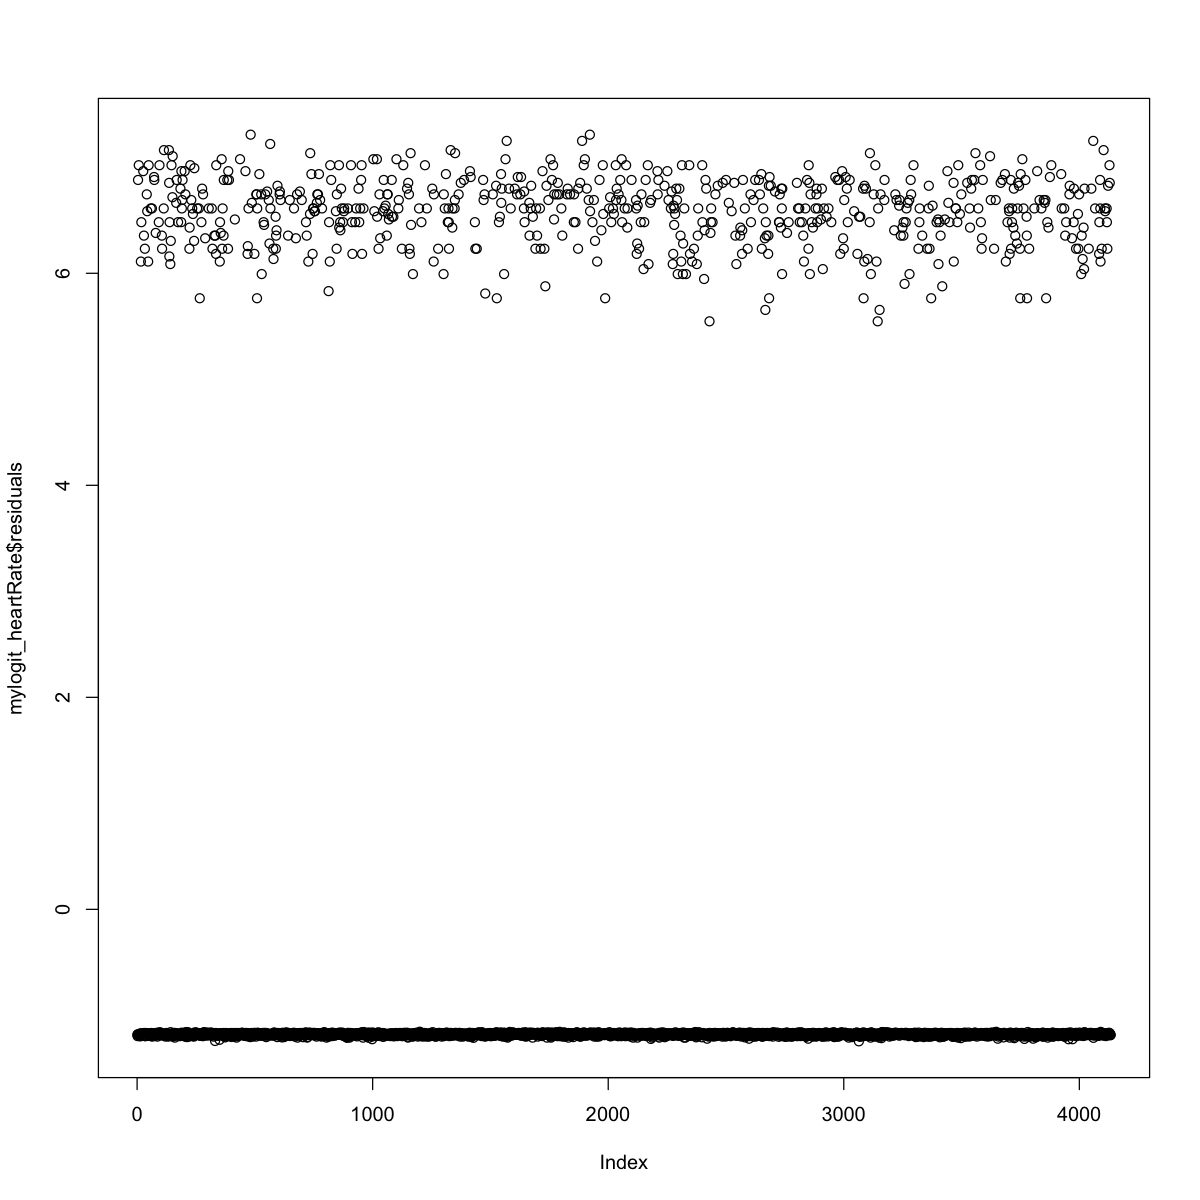

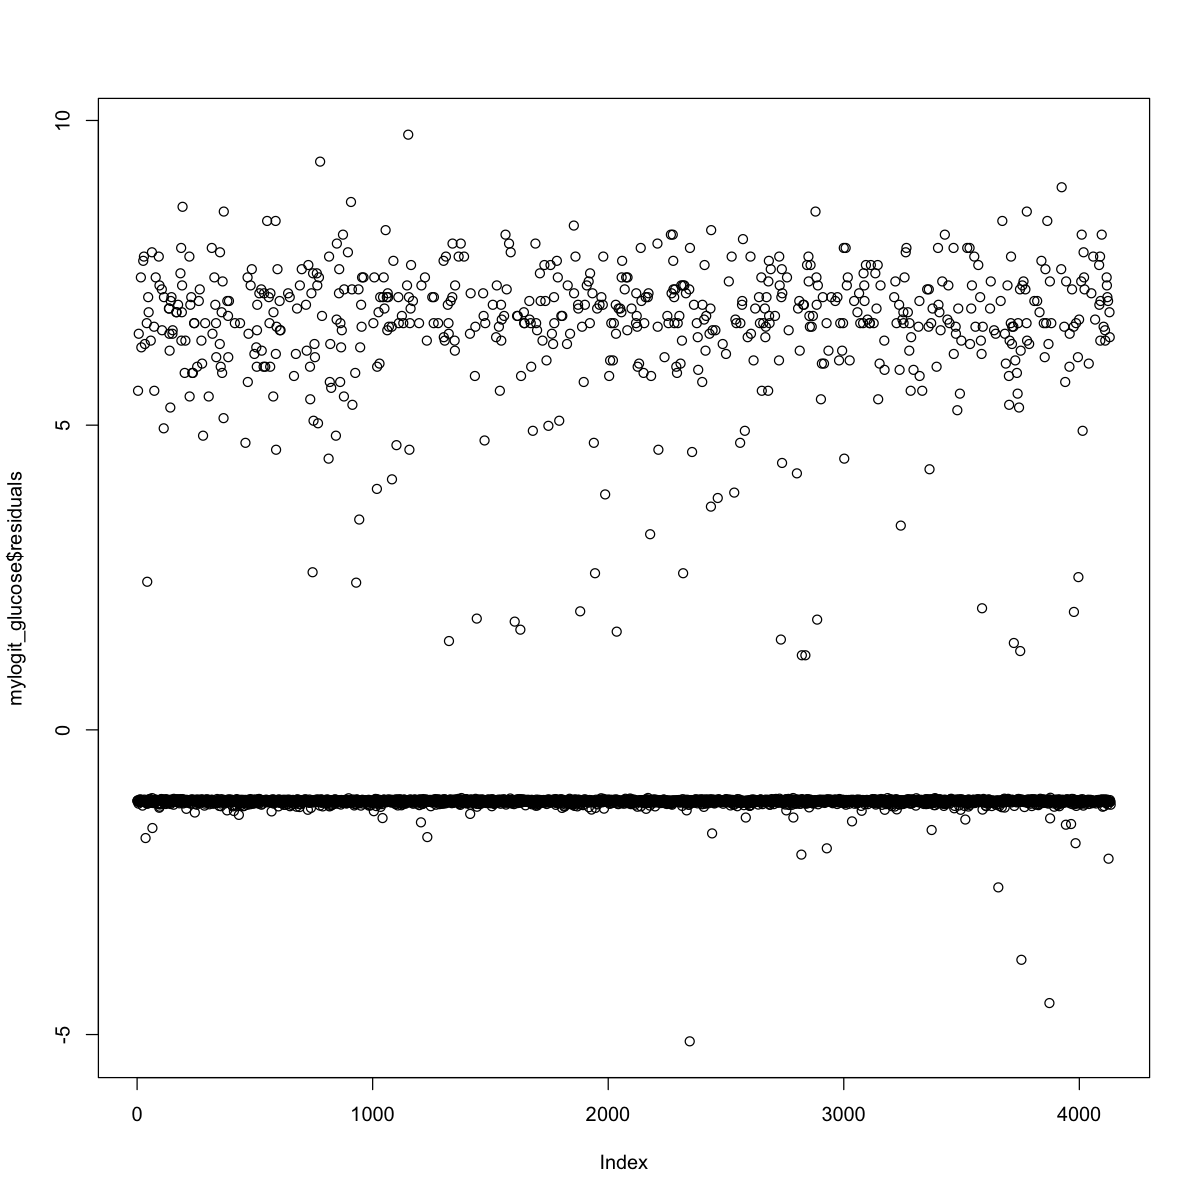

In [78]:
plot(mylogit_age$residuals) 
plot(mylogit_cigsPerDay$residuals) 
plot(mylogit_totChol$residuals) 
plot(mylogit_sysBP$residuals) 
plot(mylogit_diaBP$residuals) 
plot(mylogit_BMI$residuals) 
plot(mylogit_heartRate$residuals) 
plot(mylogit_glucose$residuals)

__*The points are evenly distributed  accross the x axis for all of the variables, so all of them meet the assumption of independence of errors*__

### Durbin-Watson Test to confirm indeoendence of errors

In [80]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [81]:
dwtest(mylogit_age, alternative="two.sided")
dwtest(mylogit_cigsPerDay, alternative="two.sided")
dwtest(mylogit_totChol, alternative="two.sided")
dwtest(mylogit_sysBP, alternative="two.sided")
dwtest(mylogit_diaBP, alternative="two.sided")
dwtest(mylogit_BMI, alternative="two.sided")
dwtest(mylogit_heartRate, alternative="two.sided")
dwtest(mylogit_glucose, alternative="two.sided")


	Durbin-Watson test

data:  mylogit_age
DW = 2.0415, p-value = 0.182
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_cigsPerDay
DW = 2.0362, p-value = 0.244
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_totChol
DW = 2.037, p-value = 0.2342
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_sysBP
DW = 2.0469, p-value = 0.1317
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_diaBP
DW = 2.0385, p-value = 0.2161
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_BMI
DW = 2.0325, p-value = 0.2954
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_heartRate
DW = 2.0374, p-value = 0.2291
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_glucose
DW = 2.0323, p-value = 0.2981
alternative hypothesis: true autocorrelation is not 0


__*None of the tests are statistically significant, which confirms that all of the errors are independent*__

### Screening for outliers

In [83]:
infl_mylogit_age = influence.measures(mylogit_age) 
summary(infl_mylogit_age)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ age, family = "binomial", data = logitdf) :

     dfb.1_ dfb.age dffit   cov.r   cook.d hat    
16    0.06  -0.05    0.06    1.00_*  0.00   0.00  
18    0.03  -0.03    0.04    1.00_*  0.00   0.00  
26    0.03  -0.02    0.04    1.00_*  0.00   0.00  
41    0.01  -0.01    0.04    1.00_*  0.00   0.00  
58    0.05  -0.05    0.06    1.00_*  0.00   0.00  
60    0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
72    0.04  -0.04    0.05    1.00_*  0.00   0.00  
79    0.05  -0.05    0.06    1.00_*  0.00   0.00  
91    0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
95    0.05  -0.05    0.06    1.00_*  0.00   0.00  
105   0.05  -0.05    0.06    1.00_*  0.00   0.00  
106  -0.05   0.05    0.06    1.00    0.00   0.00_*
108   0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
113   0.02  -0.01    0.04    1.00_*  0.00   0.00  
120   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
136   0.05  -0.04    0.05    1.00_*  0.00   0.00  
137   0.02  -0.02  

In [93]:
infl_mylogit_cigsPerDay = influence.measures(mylogit_cigsPerDay) 
summary(infl_mylogit_cigsPerDay)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ cigsPerDay, family = "binomial", data = logitdf) :

     dfb.1_ dfb.cgPD dffit   cov.r   cook.d hat    
31    0.01  -0.02    -0.03    1.00_*  0.00   0.00  
32    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
47   -0.02   0.08     0.09_*  1.00    0.00   0.00_*
77    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
86    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
105  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
117   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
139   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
153   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
165   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
180   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
190  -0.02   0.08     0.09_*  1.00    0.00   0.00_*
200   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
211   0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
222  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
235   0.01  -0.03    -0.04    1.00_*  0.00   0.

In [94]:
infl_mylogit_totChol = influence.measures(mylogit_totChol) 
summary(infl_mylogit_totChol)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ totChol, family = "binomial", data = logitdf) :

     dfb.1_ dfb.ttCh dffit   cov.r   cook.d hat    
4     0.02  -0.01     0.04    1.00_*  0.00   0.00  
7     0.03  -0.03     0.04    1.00_*  0.00   0.00  
14    0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
16    0.02  -0.02     0.04    1.00_*  0.00   0.00  
33    0.03  -0.02     0.04    1.00_*  0.00   0.00  
58    0.03  -0.03     0.04    1.00_*  0.00   0.00  
63    0.02  -0.02     0.04    1.00_*  0.00   0.00  
72    0.02  -0.02     0.04    1.00_*  0.00   0.00  
85    0.02  -0.02    -0.03    1.00_*  0.00   0.00  
95    0.03  -0.03     0.04    1.00_*  0.00   0.00  
146   0.03  -0.02     0.04    1.00_*  0.00   0.00  
151   0.03  -0.02     0.04    1.00_*  0.00   0.00  
166   0.03  -0.02     0.04    1.00_*  0.00   0.00  
174  -0.05   0.06     0.07_*  1.00    0.00   0.00  
184   0.03  -0.02     0.04    1.00_*  0.00   0.00  
191  -0.15   0.16     0.16_*  1.01_*  0.01   0.01_

In [95]:
infl_mylogit_sysBP = influence.measures(mylogit_sysBP) 
summary(infl_mylogit_sysBP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.syBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.01   0.00     0.03    1.00_*  0.00   0.00  
18    0.04  -0.04     0.05    1.00_*  0.00   0.00  
26    0.05  -0.05     0.05    1.00_*  0.00   0.00  
29   -0.05   0.06     0.07_*  1.00    0.00   0.00_*
43   -0.07   0.08     0.09_*  1.00_*  0.00   0.00_*
45    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
47    0.04  -0.03     0.04    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
65    0.04  -0.05    -0.06    1.00_*  0.00   0.00_*
72    0.04  -0.04     0.05    1.00_*  0.00   0.00  
73    0.01   0.00     0.03    1.00_*  0.00   0.00  
78    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
82    0.03  -0.04    -0.04    1.00_*  0.00   0.00_*
85    0.06  -0.07    -0.07_*  1.00_*  0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  


In [96]:
infl_mylogit_diaBP = influence.measures(mylogit_diaBP) 
summary(infl_mylogit_diaBP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ diaBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.diBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.04  -0.04     0.05    1.00_*  0.00   0.00  
10    0.03  -0.03    -0.03    1.00_*  0.00   0.00  
18    0.02  -0.02     0.04    1.00_*  0.00   0.00  
26    0.05  -0.04     0.05    1.00_*  0.00   0.00  
29   -0.09   0.09     0.10_*  1.00_*  0.00   0.00_*
45    0.04  -0.04    -0.05    1.00_*  0.00   0.00_*
47    0.05  -0.04     0.05    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
72    0.03  -0.03     0.04    1.00_*  0.00   0.00  
79   -0.06   0.07     0.07_*  1.00    0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  
95    0.06  -0.06     0.07    1.00_*  0.00   0.00  
113   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.04  -0.04     0.05    1.00_*  0.00   0.00  
137   0.02  -0.01     0.04    1.00_*  0.00   0.00  


In [97]:
infl_mylogit_BMI = influence.measures(mylogit_BMI) 
summary(infl_mylogit_BMI)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ BMI, family = "binomial", data = logitdf) :

     dfb.1_ dfb.BMI dffit   cov.r   cook.d hat    
18    0.03  -0.02    0.04    1.00_*  0.00   0.00  
23    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
26    0.02  -0.02    0.04    1.00_*  0.00   0.00  
35    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
36    0.05  -0.05   -0.05    1.00_*  0.00   0.00_*
41    0.01  -0.01    0.03    1.00_*  0.00   0.00  
71    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
73   -0.06   0.06    0.07_*  1.00    0.00   0.00_*
76    0.08  -0.09   -0.09_*  1.01_*  0.00   0.01_*
85    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
106  -0.11   0.11    0.12_*  1.00_*  0.01   0.00_*
112   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
121   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
138   0.02  -0.02    0.04    1.00_*  0.00   0.00  
141  -0.09   0.10    0.10_*  1.00_*  0.00   0.00_*
163   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
166   0.02  -0.02  

In [98]:
infl_mylogit_heartRate = influence.measures(mylogit_heartRate) 
summary(infl_mylogit_heartRate)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ heartRate, family = "binomial", data = logitdf) :

     dfb.1_ dfb.hrtR dffit   cov.r   cook.d hat    
65    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
86    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
97   -0.02   0.02    -0.02    1.00_*  0.00   0.00  
121   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
134   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
142  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
160   0.03  -0.03    -0.03    1.00_*  0.00   0.00_*
203   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
208  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
212   0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
216  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
220   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
241   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
266  -0.09   0.09     0.10_*  1.00    0.01   0.00_*
285  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
325   0.02  -0.02    -0.02    1.00_*  0.00   0.0

In [99]:
infl_mylogit_glucose = influence.measures(mylogit_glucose)
summary(infl_mylogit_glucose)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ glucose, family = "binomial", data = logitdf) :

     dfb.1_ dfb.glcs dffit   cov.r   cook.d hat    
16    0.03  -0.02     0.04    1.00_*  0.00   0.00  
26    0.03  -0.02     0.04    1.00_*  0.00   0.00  
29    0.03  -0.02     0.04    1.00_*  0.00   0.00  
36    0.12  -0.13    -0.13_*  1.01_*  0.01   0.01_*
41    0.01   0.00     0.03    1.00_*  0.00   0.00  
43   -0.13   0.15     0.15_*  1.01_*  0.01   0.01_*
47    0.02  -0.01     0.03    1.00_*  0.00   0.00  
49    0.02  -0.01     0.03    1.00_*  0.00   0.00  
63    0.03  -0.02     0.04    1.00_*  0.00   0.00  
65    0.09  -0.10    -0.10_*  1.01_*  0.00   0.01_*
79    0.03  -0.02     0.04    1.00_*  0.00   0.00  
92    0.03  -0.02     0.04    1.00_*  0.00   0.00  
95    0.02  -0.01     0.04    1.00_*  0.00   0.00  
105   0.02  -0.01     0.04    1.00_*  0.00   0.00  
114   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.02  -0.01     0.03    1.00_*  0.00   0.00 

## Assumption Checking Summary
* The variables that meet the sample size assumption are __glucose__ and __sysBP__
* The variables that meet the logit linearity assumption are __age__, __BMI__, __cigsPerDay__, __sysBP__, __heartRate__, and __totChol__.
* All of the variables have independent errors
* Multicollinearity: we noted in the exploratory data analysis that sysBP and diaBP are strongly correlated, so we will have to eliminate one of them
* None of the variables have outliers:
    * dfb.1_ and dffit values are less than 1
    * hat < .3

In [81]:
summary(mylogit_sysBP)


Call:
glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5588  -0.5812  -0.4935  -0.4201   2.4696  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.023674   0.258651  -19.42   <2e-16 ***
sysBP        0.024225   0.001819   13.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3344.0  on 4131  degrees of freedom
AIC: 3348

Number of Fisher Scoring iterations: 4


In [100]:
coef(mylogit_sysBP)

(Intercept)       sysBP 
-5.02367357  0.02422481

***
## If all of the variables had met the assumptions
### Method based on [www.utstat.toronto.edu](http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11StepwiseLogisticR.pdf)

### Run the full model

#### Dropping diaBP due to multicollinearity 

In [101]:
head(logitdf)

age cigsPerDay totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0  70   26.97 80         77     0         
2 46   0         250     121.0  81   28.73 95         76     0         
3 48  20         245     127.5  80   25.34 75         70     0         
4 61  30         225     150.0  95   28.58 65        103     1         
5 46  23         285     130.0  84   23.10 85         85     0         
6 43   0         228     180.0 110   30.30 77         99     0         
  Predicted_glucose
1 0                
2 0                
3 0                
4 0                
5 0                
6 0

In [103]:
logitdfLR = subset(logitdf, select = -c(diaBP, Predicted_glucose))
head(logitdfLR)

age cigsPerDay totChol sysBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0 26.97 80         77     0         
2 46   0         250     121.0 28.73 95         76     0         
3 48  20         245     127.5 25.34 75         70     0         
4 61  30         225     150.0 28.58 65        103     1         
5 46  23         285     130.0 23.10 85         85     0         
6 43   0         228     180.0 30.30 77         99     0

In [104]:
fullmod = glm(TenYearCHD ~ ., data = logitdfLR,family=binomial)
summary(fullmod)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8392  -0.6021  -0.4380  -0.3124   2.7421  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.303615   0.531178 -15.632  < 2e-16 ***
age          0.065461   0.006102  10.728  < 2e-16 ***
cigsPerDay   0.027287   0.003711   7.353 1.94e-13 ***
totChol      0.001166   0.001052   1.108    0.268    
sysBP        0.016158   0.002129   7.590 3.21e-14 ***
BMI          0.007705   0.011275   0.683    0.494    
heartRate   -0.004888   0.003880  -1.260    0.208    
glucose      0.007576   0.001651   4.589 4.46e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3164.5  on 4125  degrees of freedom
AIC: 3180.5

Number of Fisher Scoring iterations: 5


__*It seems that age, cigarretes per day, total cholesterol, systolic blood pressure, and glucose are the only factors that are significant predictors*__

In [105]:
nullmodel = glm(TenYearCHD ~ 1, data = logitdfLR, family=binomial)
summary(nullmodel)


Call:
glm(formula = TenYearCHD ~ 1, family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5741  -0.5741  -0.5741  -0.5741   1.9412  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71941    0.04333  -39.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3521.9  on 4132  degrees of freedom
AIC: 3523.9

Number of Fisher Scoring iterations: 3


In [106]:
backwards = step(fullmod)

Start:  AIC=3180.5
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + 
    glucose

             Df Deviance    AIC
- BMI         1   3165.0 3179.0
- totChol     1   3165.7 3179.7
- heartRate   1   3166.1 3180.1
<none>            3164.5 3180.5
- glucose     1   3185.6 3199.6
- cigsPerDay  1   3216.5 3230.5
- sysBP       1   3222.0 3236.0
- age         1   3283.3 3297.3

Step:  AIC=3178.97
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + heartRate + 
    glucose

             Df Deviance    AIC
- totChol     1   3166.2 3178.2
- heartRate   1   3166.5 3178.5
<none>            3165.0 3179.0
- glucose     1   3186.3 3198.3
- cigsPerDay  1   3216.5 3228.5
- sysBP       1   3230.2 3242.2
- age         1   3283.4 3295.4

Step:  AIC=3178.2
TenYearCHD ~ age + cigsPerDay + sysBP + heartRate + glucose

             Df Deviance    AIC
- heartRate   1   3167.6 3177.6
<none>            3166.2 3178.2
- glucose     1   3187.6 3197.6
- cigsPerDay  1   3217.6 3227.6
- sysBP       1   3

In [107]:
summary(backwards)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [108]:
forwards = step(nullmodel,scope=list(lower=formula(nullmodel),upper=formula(fullmod)), direction="forward")

Start:  AIC=3523.92
TenYearCHD ~ 1

             Df Deviance    AIC
+ age         1   3306.4 3310.4
+ sysBP       1   3344.0 3348.0
+ glucose     1   3477.9 3481.9
+ totChol     1   3494.1 3498.1
+ BMI         1   3501.3 3505.3
+ cigsPerDay  1   3510.9 3514.9
<none>            3521.9 3523.9
+ heartRate   1   3520.2 3524.2

Step:  AIC=3310.4
TenYearCHD ~ age

             Df Deviance    AIC
+ sysBP       1   3236.4 3242.4
+ cigsPerDay  1   3262.3 3268.3
+ glucose     1   3280.5 3286.5
+ BMI         1   3298.9 3304.9
+ totChol     1   3302.8 3308.8
+ heartRate   1   3304.2 3310.2
<none>            3306.4 3310.4

Step:  AIC=3242.42
TenYearCHD ~ age + sysBP

             Df Deviance    AIC
+ cigsPerDay  1   3188.2 3196.2
+ glucose     1   3217.9 3225.9
<none>            3236.4 3242.4
+ totChol     1   3235.4 3243.4
+ BMI         1   3236.3 3244.3
+ heartRate   1   3236.4 3244.4

Step:  AIC=3196.24
TenYearCHD ~ age + sysBP + cigsPerDay

            Df Deviance    AIC
+ glucose    1   3167.6

In [109]:
summary(forwards)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [110]:
bothways = step(nullmodel, list(lower=formula(nullmodel),upper=formula(fullmod)),direction="both",trace=0)
summary(bothways)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [111]:
formula(backwards)

TenYearCHD ~ age + cigsPerDay + sysBP + glucose

In [112]:
formula(forwards)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

In [113]:
formula(bothways)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

## Method based on [www.sthda.com](http://www.sthda.com/english/articles/36-classification-methods-essentials/150-stepwise-logistic-regression-essentials-in-r/)

### Load libraries

In [114]:
library("caret")
library("MASS")
library("tidyverse")

Loading required package: lattice


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ MASS::select()  masks dplyr::select()



In [115]:
head(logitdfLR)

age cigsPerDay totChol sysBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0 26.97 80         77     0         
2 46   0         250     121.0 28.73 95         76     0         
3 48  20         245     127.5 25.34 75         70     0         
4 61  30         225     150.0 28.58 65        103     1         
5 46  23         285     130.0 23.10 85         85     0         
6 43   0         228     180.0 30.30 77         99     0

### Split the data into training and test set

In [116]:
training.samples = logitdfLR$TenYearCHD %>% createDataPartition(p= 0.8, list = FALSE)
train.data  <- logitdfLR[training.samples, ]
test.data <- logitdfLR[-training.samples, ]

### Fit the model

In [117]:
# stepAIC function: default direction is backward - arg: direction = c("both", "backward", "forward")
mylogit  = glm(TenYearCHD ~ ., data = train.data, family = binomial) %>% stepAIC(trace = FALSE)
summary(mylogit)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8775  -0.6010  -0.4410  -0.3181   2.7097  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.181147   0.426822 -19.168  < 2e-16 ***
age          0.066878   0.006680  10.011  < 2e-16 ***
cigsPerDay   0.023808   0.004209   5.656 1.55e-08 ***
sysBP        0.016183   0.002233   7.247 4.26e-13 ***
glucose      0.007100   0.001781   3.986 6.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2558.8  on 3302  degrees of freedom
AIC: 2568.8

Number of Fisher Scoring iterations: 5


### Predict Probabilities Risk/No Risk for heart disease

In [118]:
probabilities <- mylogit %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)

### Model Accuracy

In [119]:
# Model accuracy
mean(predicted.classes==test.data$TenYearCHD)

[1] 0.8571429

### Full Model

In [125]:
full.model <- glm(TenYearCHD ~., data = train.data, family = binomial)
summary(full.model)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8360  -0.6004  -0.4401  -0.3176   2.7177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.9298915  0.5865104 -13.520  < 2e-16 ***
age          0.0655682  0.0067798   9.671  < 2e-16 ***
cigsPerDay   0.0242412  0.0042329   5.727 1.02e-08 ***
totChol      0.0008315  0.0011727   0.709    0.478    
sysBP        0.0166518  0.0023740   7.014 2.31e-12 ***
BMI         -0.0007191  0.0125389  -0.057    0.954    
heartRate   -0.0059153  0.0043147  -1.371    0.170    
glucose      0.0073000  0.0017909   4.076 4.58e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2556.5  on 3299  degrees of freedom
AIC: 2572.5

Number of Fisher Scoring iterations: 5


### Stepwise Selection

In [127]:
step.model <- full.model %>% stepAIC(trace = FALSE)
summary(step.model)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8775  -0.6010  -0.4410  -0.3181   2.7097  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.181147   0.426822 -19.168  < 2e-16 ***
age          0.066878   0.006680  10.011  < 2e-16 ***
cigsPerDay   0.023808   0.004209   5.656 1.55e-08 ***
sysBP        0.016183   0.002233   7.247 4.26e-13 ***
glucose      0.007100   0.001781   3.986 6.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2558.8  on 3302  degrees of freedom
AIC: 2568.8

Number of Fisher Scoring iterations: 5


### Compare the full and the stepwise models

#### 1. Full Model

In [123]:
# Make predictions
probabilities <- full.model %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$TenYearCHD
mean(predicted.classes == observed.classes)

[1] 0.8571429

#### 2. Stepwise Model

In [124]:
# Make predictions
probabilities <- predict(step.model, test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$TenYearCHD
mean(predicted.classes == observed.classes)

[1] 0.8571429

### The stepwise model is best because it is less complex and achieves the same accuracy. Also, the full model includes variables that are not significant predictors of the CHD risk (p value > .05).